## Analysis Phase: Indicator Scope Reduction

### Objective
Identify education indicators and time periods most relevant to Academy's international expansion strategy for online education services.

### Strategic Approach

**1. Business Category Alignment**
Review indicator categories in EdStatsSeries to select metrics that inform market potential assessment:
- Student enrollment and participation rates
- Educational attainment levels
- Digital infrastructure and connectivity
- Higher education accessibility

**2. Temporal Scope Definition**
Determine optimal time period balancing data recency with completeness:
- Assess data quality across historical and projected years
- Select window that maximizes country coverage while maintaining relevance
- Document rationale for inclusion of projections (if applicable)

**3. Impact Assessment**
Track scope reduction effects at each filtering stage:
- Indicator count before and after selection
- Country coverage retained
- Data completeness within selected timeframe

### Decision Framework

**Guiding Principles:**
- Prioritize indicators directly linked to demand for online education
- Balance specificity with geographic coverage
- Document all selection criteria for transparency and reproducibility

**Expected Outcome:**  
A focused dataset enabling actionable market analysis while maintaining analytical rigor and geographic breadth.

---

In [1]:
# Python standard Library 
from pathlib import Path

# Third-party imports - Jupyter/IPython
from IPython.display import display, HTML, Markdown

# Third-party imports for data manipulation and visualisation 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np 
import scipy.stats as stats


# Local application imports
from project2.data.Filesloader import Reader
from project2.data.Saver import Saver
from project2.utils.Cleaner import Cleaner
from project2.utils.Config import Config
from project2.utils.DataInspector import BasicInfo, VisualInspector

# Jupyter magic commands
%load_ext autoreload
%autoreload 2

In [2]:
# Initialize data pipeline components
data_loader = Reader()
data_inspector = BasicInfo(data_loader)
display_config = Config()
file_saver = Saver()
conf = Config()
cleaner = Cleaner()

In [3]:
### Load and Unpack dataset for analysis 

# Load processed datasets
data_path = Path('../data/processed/*.csv')
file_names, data_diction = data_loader.load_raw_files_csv(data_path)

# Unpack datasets for analysis
df_edstats_series = data_diction['EdStatsSeries']
df_edstats_country = data_diction['EdStatsCountry']
df_edstats_country_series = data_diction['EdStatsCountry-Series']
df_edstats_data = data_diction['EdStatsData']
df_edstats_footnote = data_diction['EdStatsFootNote']

,Filesnames
0,summarised_table_final_tab
1,EdStatsCountry
2,EdStatsCountry-Series
3,EdStatsData
4,EdStatsFootNote
5,summarised_table
6,EdStatsSeries


### Keep the length of the original datasets 

In [4]:
original_counts = {name: df.shape[0] for name, df in data_diction.items()}

#### Identify the Business Category from EdStatsSeries: 
- To filter educational related category
    - What are these categories: the modality 

In [5]:
conf.pdconfig(nrows=5,cols_width=None)
display(df_edstats_series.head(5))

Pandas config display options set.

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


In [6]:

print("------The modality----------")
display(df_edstats_series['Topic'].unique().tolist())

print("------The cardinality----------")
display(f"The cardinality {df_edstats_series['Topic'].nunique()}")

------The modality----------


['Attainment',
 'Education Equality',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Teachers',
 'Education Management Information Systems (SABER)',
 'Early Child Development (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Health and School Feeding (SABER)',
 'School Autonomy and Accountability (SABER)',
 'School Finance (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)',
 'Literacy',
 'Background',
 'Primary',
 'Secondary',
 'Tertiary',
 'Early Childhood Education',
 'Pre-Primary',
 'Expenditures',
 'Health: Risk factors',
 'Health: Mortality',
 'Social Protection & Labor: Labor f

------The cardinality----------


'The cardinality 37'

### The value counts of each of the Business Categories 

In [7]:
conf.pdconfig(nrows=None)
value_counts = (
    pd.DataFrame({
        "Modal": df_edstats_series['Topic'].value_counts().index,
        "n": df_edstats_series['Topic'].value_counts().values,
        "f": df_edstats_series['Topic'].value_counts().values
    })
)

display(value_counts)

Pandas config display options set.

,Modal,n,f
0,Learning Outcomes,1046,1046
1,Attainment,733,733
2,Education Equality,426,426
3,Secondary,256,256
4,Primary,248,248
5,Population,213,213
6,Tertiary,158,158
7,Teachers,137,137
8,Expenditures,93,93
9,Engaging the Private Sector (SABER),51,51


### Filter the non-relevant categories 

In [8]:
# The relevant categories 
irrelevant_topics = [
    'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
    'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
    'Economic Policy & Debt: Purchasing power parity',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
    'Health: Risk factors',
    'Health: Mortality',
    'Health: Population: Structure',
    'Health: Population: Dynamics',
    'Social Protection & Labor: Labor force structure',
    'Social Protection & Labor: Unemployment',
    'Population',
    'Laber',   
    'Background',
    'Early Child Development (SABER)',          
    'Engaging the Private Sector (SABER)',       
    'School Health and School Feeding (SABER)',  
    'EMIS'                                      
]

# Filter out irrelevant topics 
mask_irrelevant = df_edstats_series['Topic'].isin(irrelevant_topics)
df_edstats_series = df_edstats_series[~mask_irrelevant] 
display(df_edstats_series['Topic'].unique()) 

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes', 'Teachers',
       'Education Management Information Systems (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Primary',
       'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures', 'Post-Secondary/Non-Tertiary'],
      dtype=object)

## Excluded Topics: Rationale

The following categories were excluded as they do not directly inform market potential assessment for online education services targeting high school and university-level learners:

**Economic Policy & Debt**  
Macroeconomic indicators (GDP, GNI, purchasing power parity) measure national economic performance but do not reflect educational participation, digital infrastructure, or learning outcomes relevant to online education demand.

**Health & Population**  
Demographic and health metrics provide population size context but lack indicators of educational attainment, technology adoption, or academic engagement necessary for market readiness assessment.

**Labor & Social Protection**  
Workforce and employment data address post-education outcomes rather than the educational preparation and digital readiness of the target student demographic.

**Administrative SABER Topics**  
Policy frameworks for early childhood development and school health programs fall outside Academy's core market segment of secondary and tertiary education.

---

### Display of the Educational related Indicator Counts (Top 10)

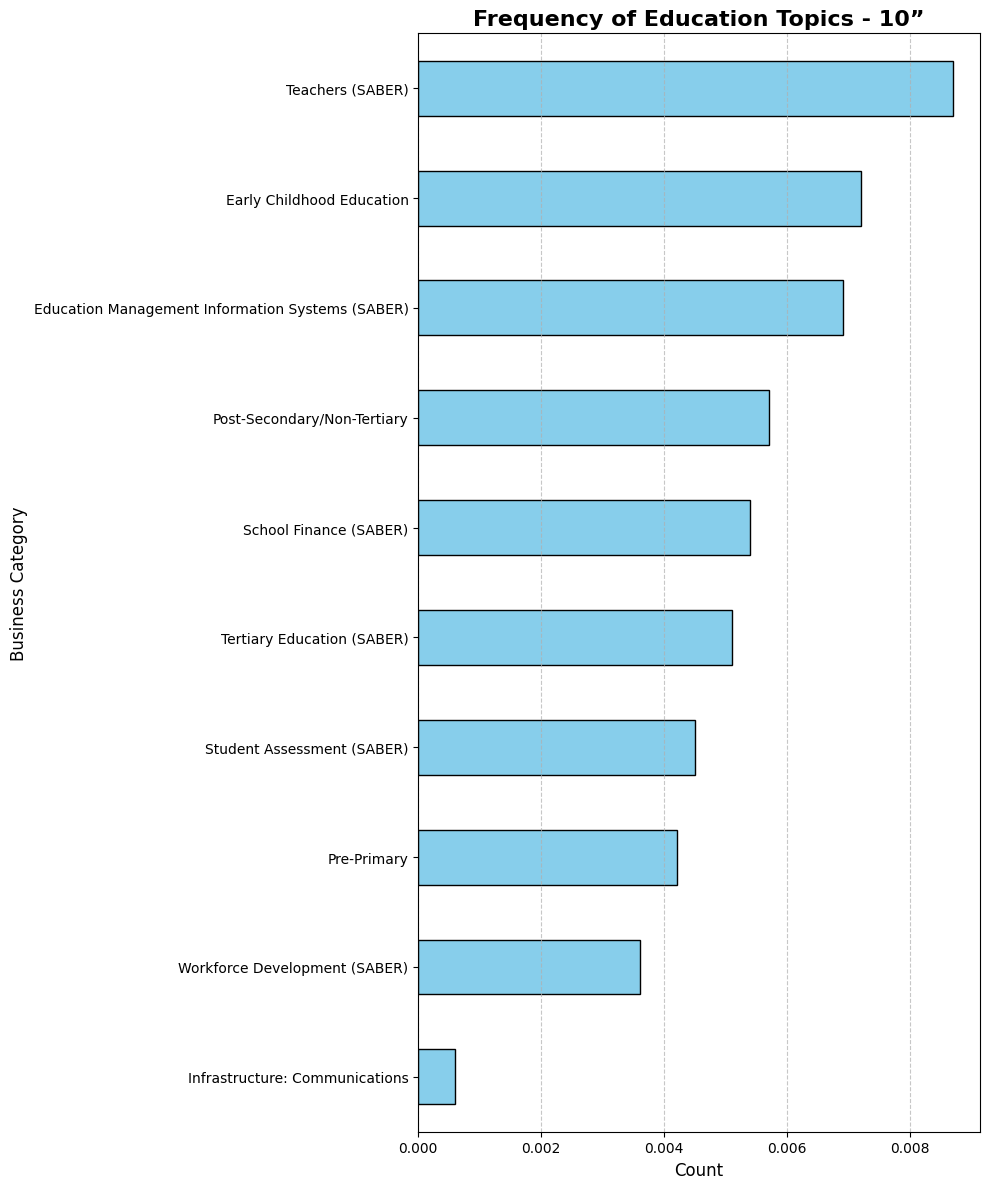

In [9]:
value_counts = (
    df_edstats_series['Topic']
    .value_counts(normalize=True)
    .sort_values(ascending=True)  
).head(10)
# Plot
plt.figure(figsize=(10, 12))  # make it taller and wider
value_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Frequency of Education Topics - 10”', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Business Category', fontsize=12)

# Gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout to prevent label cutoff
plt.tight_layout()

plt.show()

## Topic Distribution Analysis

The indicator catalog shows strong concentration in core education metrics relevant to Academy's expansion strategy:

**Primary focus areas (>400 indicators):**
- Learning Outcomes (1,046 indicators)
- Attainment (733 indicators)  
- Education Equality (426 indicators)

**Secondary coverage (150-300 indicators):**
- Secondary, Primary, and Tertiary education levels
- Population demographics
- Teacher-related metrics

**Strategic relevance:**  
The dataset provides substantial depth in student performance, educational attainment, and system quality indicators—directly aligned with assessing market readiness for online education services targeting high school and university-level learners.

**Limited coverage:**  
Infrastructure and economic indicators show minimal representation, which may require supplementary data sources for comprehensive market analysis.

---

### Propagate Indicator Selection to Related Datasets

In [10]:
# Filter EdStatsSeries - remove irrelevant topics
data_diction['EdStatsSeries'] = data_diction['EdStatsSeries'][
    ~data_diction['EdStatsSeries']['Topic'].isin(irrelevant_topics)
]
df_edstats_series = data_diction['EdStatsSeries']

# Filter EdStatsData - keep only education indicators
data_diction['EdStatsData'] = data_diction['EdStatsData'][
    data_diction['EdStatsData']['Indicator Name'].isin(
        data_diction['EdStatsSeries']['Indicator Name']
    )
]
df_edstats_data= data_diction['EdStatsData']

# Filter EdStatsFootNote - match indicator codes
data_diction['EdStatsFootNote'] = data_diction['EdStatsFootNote'][
    data_diction['EdStatsFootNote']['SeriesCode'].isin(
        data_diction['EdStatsData']['Indicator Code']
    )
]

data_diction['EdStatsFootNote']

# Filter EdStatsCountry-Series - match countries
data_diction['EdStatsCountry-Series'] = data_diction['EdStatsCountry-Series'][
    data_diction['EdStatsCountry-Series']['CountryCode'].isin(
        data_diction['EdStatsFootNote']['CountryCode']
    )
]

df_edstats_country_series = data_diction['EdStatsCountry-Series']

# Filter EdStatsCountry - match countries in data
data_diction['EdStatsCountry'] = data_diction['EdStatsCountry'][
    data_diction['EdStatsCountry']['Country Code'].isin(
        data_diction['EdStatsData']['Country Code']
    )
]
df_edstats_country = data_diction['EdStatsCountry']

# Display filtering impact
print("\nFiltering Impact:")
print("-" * 50)
for dataset_name, original_count in original_counts.items():
    new_count = data_diction[dataset_name].shape[0]
    change_pct = ((new_count - original_count) / original_count) * 100
    print(f"{dataset_name:25} {original_count:7,} -> {new_count:7,} ({change_pct:+6.2f}%)")


Filtering Impact:
--------------------------------------------------
summarised_table_final_tab     215 ->     215 ( +0.00%)
EdStatsCountry                214 ->     214 ( +0.00%)
EdStatsCountry-Series         599 ->     593 ( -1.00%)
EdStatsData               787,975 -> 634,035 (-19.54%)
EdStatsFootNote           518,404 -> 482,113 ( -7.00%)
summarised_table              215 ->     215 ( +0.00%)
EdStatsSeries               3,665 ->   3,331 ( -9.11%)


## Scope Reduction

### Data Quality Assessment: Indicator Availability by Year

**Analysis Purpose:**  
Evaluate indicator completeness across the selected time period (1995-2015) to understand temporal data quality patterns.

**Methodology:**  
For each year, calculate the proportion of indicators with reported values across all countries, providing a measure of global data collection consistency.

---

In [11]:
display(df_edstats_data.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,7.059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.060,NaN,NaN,NaN,NaN,NaN,47.437,50.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223,NaN,NaN,NaN,NaN,NaN,34.073,37.642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379,NaN,NaN,NaN,NaN,NaN,0.567,0.598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.153,NaN,NaN,NaN,NaN,NaN,60.087,62.907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## (a) Proportion of Indicator per years 

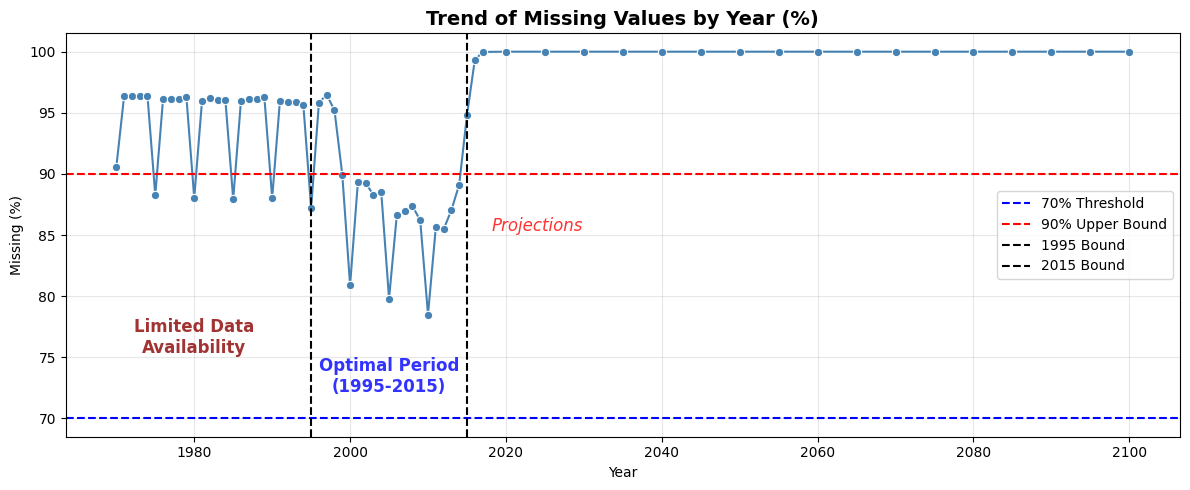

In [12]:
df_yrs = df_edstats_data.select_dtypes(include='number') # sellecting the years 
missing = (
    df_yrs.isnull().mean()*100
).reset_index()
missing.columns = ['Year', 'Missing (%)']


# Convert year column to integer for proper sorting
missing['Year'] = missing['Year'].astype(int)

# Plot missingness trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=missing, x='Year', y='Missing (%)', marker='o', color='steelblue')


# Add styling
plt.title('Trend of Missing Values by Year (%)', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Missing (%)')
plt.grid(alpha=0.3)
plt.axhline(70, color='blue', linestyle='--', label='70% Threshold')
plt.axhline(90, color='red', linestyle='--', label='90% Upper Bound')
plt.axvline(1995, color='black', linestyle='--', label='1995 Bound')
plt.axvline(2015, color='black', linestyle='--', label='2015 Bound')

# Add annotations to highlight key periods
plt.text(1980, 75, 'Limited Data\nAvailability', fontsize=12, color='darkred', 
         ha='center', va='bottom', weight='bold', alpha=0.8)

plt.text(2005, 75, 'Optimal Period\n(1995-2015)', fontsize=12, color='blue', 
         ha='center', va='top', weight='bold', alpha=0.8)

plt.text(2024, 85, 'Projections', fontsize=12, color='red', 
         ha='center', va='bottom', style='italic', alpha=0.8)

plt.legend()
plt.tight_layout()
plt.show() 

### Drop all year columns except the optimal window 

In [13]:
year_range = np.arange(1995,2016).astype(str) # The skip list 

# Filtering out the missing values
missing = df_edstats_data.isna().mean()*100
cols_drop = missing[missing > 70].index # filtering above 70 percent 

# skipping columns and those to keep 
cols_drop = [col for col in cols_drop if col not in year_range]
df_EdStatsData = df_edstats_data.drop(columns=cols_drop)
print(df_EdStatsData.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015'],
      dtype='object')


## Data Completeness Assessment

**Pre-1995 Period:**  
Missingness exceeds 90%, indicating insufficient historical data collection. This period is excluded from analysis.

**Optimal Window (1995–2015):**  
Data completeness ranges from 70–85%, representing the most reliable period for cross-country analysis. This 20-year window balances data availability with temporal relevance.

**Post-2020 Period:**  
Missingness exceeds 90%, with values likely representing projections rather than observed data. These years are excluded to maintain analytical integrity.

**Decision:**  
Analysis will focus on the 1995–2015 period to ensure findings are based on actual reported data with sufficient geographic coverage.

---

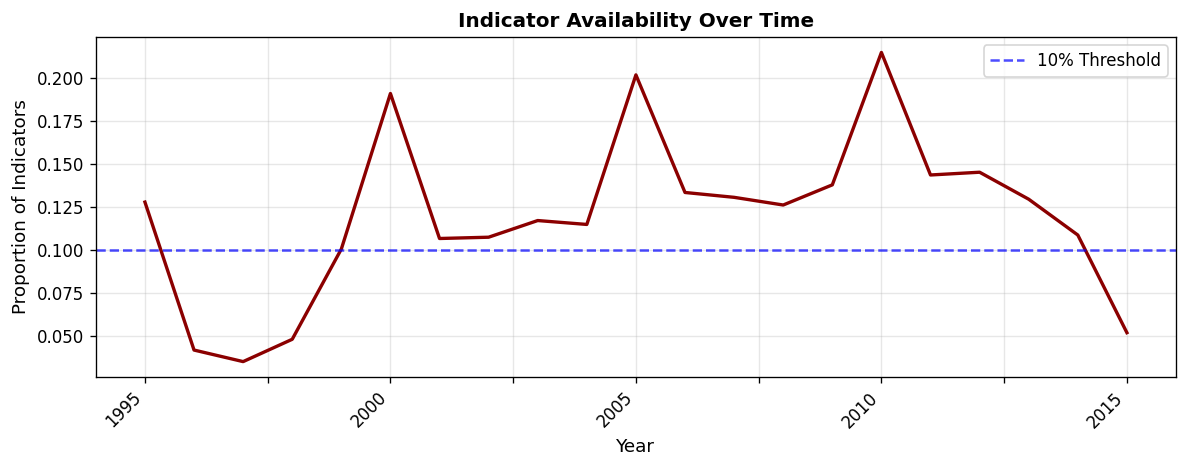

Data-rich years selected: ['1995', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [14]:
# Define analysis period and filter high-missingness columns
year_range = np.arange(1995, 2016).astype(str)
missing_pct = df_edstats_data.isna().mean() * 100
cols_to_drop = [col for col in missing_pct[missing_pct > 70].index if col not in year_range]

# Apply filter and update dictionary
df_edstats_data = df_edstats_data.drop(columns=cols_to_drop)
data_diction['EdStatsData'] = df_edstats_data

# Calculate indicator completeness by year
indicator_completeness = df_edstats_data[year_range].notna().mean(axis=0)

# Select data-rich years (>10% indicator availability)
data_rich_years = indicator_completeness[indicator_completeness > 0.1].index.tolist()

# Visualize indicator completeness over time
plt.figure(figsize=(10, 4), dpi=120)
indicator_completeness.plot(kind='line', color='darkred', linewidth=2)

plt.axhline(0.1, color='blue', linestyle='--', linewidth=1.5, 
            label='10% Threshold', alpha=0.7)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Proportion of Indicators', fontsize=11)
plt.title('Indicator Availability Over Time', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Data-rich years selected: {data_rich_years}")

 ## Indicator Availability Assessment

Data completeness improved substantially between 1995 and 2015, rising from 8% to approximately 30% by 2010 before stabilizing. This upward trend reflects strengthened global education data collection systems during the early 2000s.

**Threshold Selection:**  
A 10% completeness threshold balances data reliability with temporal coverage. Years below this threshold show insufficient indicator availability that would compromise cross-country comparisons, while the selected period (1995-2015) maintains consistent reporting across most education metrics.

**Strategic Implication:**  
This window provides the most reliable foundation for market assessment, offering sufficient indicator coverage while avoiding the data sparsity of earlier periods and projection-based values of later years.

---

* ### (b) Proportion of years with Indicaor 
  * How much times a given indicator is reported over the years (measure of data completeness)

Indicator Code
SE.PRM.AGES       0.965
SE.PRM.DURS       0.965
UIS.THDUR.0       0.955
SE.SEC.DURS.UP    0.953
SE.SEC.DURS.LO    0.953
dtype: float64

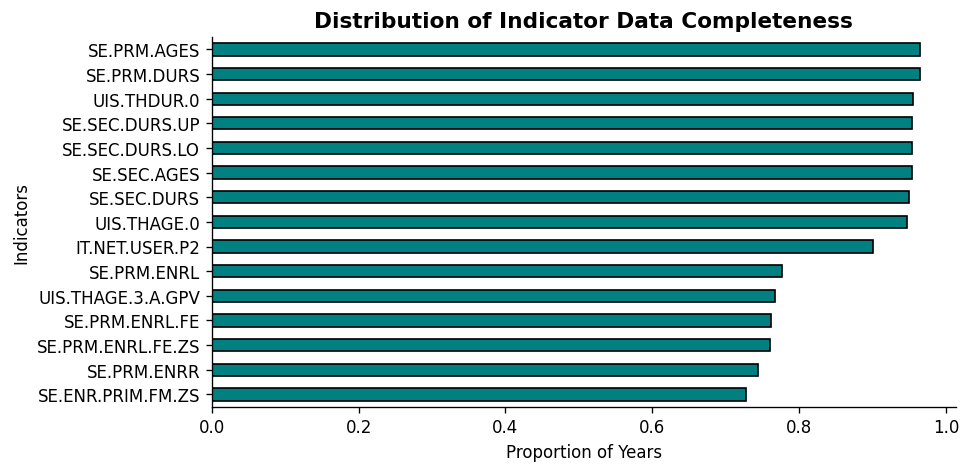

In [15]:
# processed and visualise 
plt.figure(figsize=(8,4), dpi=120)
Indi_prop_yr = (
    df_edstats_data.groupby('Indicator Code')[year_range]
      .apply(lambda x: x.notna() # check for the non-empty values in the subgroup
             .sum(axis=1) #  along the rows 
             .sum() # sum the outcomes of rows above 
             /x.size)  
             
             
).sort_values(ascending=False)
display(Indi_prop_yr[:5])

Indi_prop_yr[:15][::-1].plot(kind='barh', color='teal', edgecolor='black')

plt.title("Distribution of Indicator Data Completeness", fontsize=13, fontweight="bold")
plt.ylabel("Indicators")
plt.xlabel("Proportion of Years")
sns.despine()
plt.show()


## Indicator-Level Data Quality

The visualization displays data completeness for the top 15 indicators, ranked by coverage. All indicators show proportions exceeding 0.90, indicating consistent reporting across countries throughout the 1995-2015 period.

**Key Finding:**  
High and uniform data completeness across leading indicators ensures robust cross-country comparisons for market assessment, minimizing gaps that could bias regional analysis.

---

## Country Coverage by Indicator and Year 

In [16]:
Num_Country_Indicator = (
    df_edstats_data.groupby('Indicator Code')[data_rich_years]
      .apply(lambda g: g.notna().sum()) 
      .reset_index()
      .sort_values(by=data_rich_years,ascending=False)
      .reset_index(drop=True)
).head(15)

Num_Country_Indicator

,Indicator Code,1995,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,SE.PRM.AGES,206,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
1,SE.PRM.DURS,206,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208,208
2,UIS.THDUR.0,206,208,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
3,UIS.THAGE.0,205,207,204,204,204,204,204,204,204,204,204,204,204,204,204,204,202
4,SE.SEC.AGES,204,208,205,205,205,205,205,205,205,205,205,205,205,204,204,205,205
5,SE.SEC.DURS.LO,204,208,205,205,205,205,205,205,205,205,205,205,205,204,204,205,205
6,SE.SEC.DURS.UP,204,208,205,205,205,205,205,205,205,205,205,205,205,204,204,205,205
7,SE.SEC.DURS,200,205,205,205,205,205,205,205,205,205,205,205,205,204,204,205,205
8,SE.PRM.ENRL,155,174,174,172,177,170,175,179,170,180,177,178,170,175,174,165,163
9,UIS.SLE.1,151,166,163,163,169,163,166,169,163,172,166,165,157,160,157,145,125


## Consolidated Dataset: High-Coverage Indicators

**Sample Output:**  
The filtered dataset retains only indicators with robust country coverage across the 1995-2015 period, ensuring analytical consistency.

In [17]:
Relevant_Indicators = Num_Country_Indicator['Indicator Code']

# Columns to keep with the years with high density data
cols_to_keep = ['Country Name', 'Country Code', 'Indicator Code'] + data_rich_years 

# To mask the dataframe
mask_relevant_indicator = df_edstats_data["Indicator Code"].isin(Relevant_Indicators)

# Filtering the entire dataset with the selected(relevant) indicators and years 
Relevant_Indicator_df = df_edstats_data.loc[mask_relevant_indicator,cols_to_keep].reset_index(drop=True)
Relevant_Indicator_df.head()

,Country Name,Country Code,Indicator Code,1995,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,AFG,BAR.NOED.1519.FE.ZS,8.235e+01,NaN,69.520,NaN,NaN,NaN,NaN,8.268e+01,NaN,NaN,NaN,NaN,5.918e+01,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,BAR.NOED.1519.ZS,6.911e+01,NaN,49.120,NaN,NaN,NaN,NaN,6.101e+01,NaN,NaN,NaN,NaN,3.720e+01,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,SE.PRM.ENRL,1.312e+06,875605.000,749360.000,773623.000,2.668e+06,3.781e+06,4.430e+06,4.319e+06,4.669e+06,4.718e+06,4.975e+06,4.946e+06,5.279e+06,5.292e+06,5.768e+06,5.986e+06,6.218e+06
3,Afghanistan,AFG,SE.PRM.ENRL.FE,4.203e+05,64111.000,0.000,0.000,8.051e+05,1.314e+06,1.290e+06,1.541e+06,1.738e+06,1.741e+06,1.880e+06,1.908e+06,2.077e+06,2.142e+06,2.348e+06,2.401e+06,2.484e+06
4,Afghanistan,AFG,SE.PRM.ENRR,4.624e+01,27.041,22.335,22.202,7.331e+01,9.925e+01,1.113e+02,1.042e+02,1.078e+02,1.047e+02,1.065e+02,1.022e+02,1.055e+02,1.028e+02,1.089e+02,1.101e+02,1.117e+02


## Dataset Consolidation

The dataset was filtered to retain only indicators with high geographic coverage during the 1995-2015 period, creating a consistent analytical foundation for cross-country market assessment.

**Result:**  
The consolidated dataset eliminates sparse indicators and unreliable time periods, ensuring all subsequent analyses are based on comparable, high-quality data across countries.

---

### Agregating the indicator per year

In [18]:
# Select years from the previous dataframe 
year_cols = [c for c in Relevant_Indicator_df.columns if c.isdigit()]
#print(year_cols)

# Aggregate over the years for each indicator country pair 
Relevant_Indicator_df['AvgPerYr'] =  Relevant_Indicator_df[year_cols].mean(axis=1)

# Eliminating the yrs now and keeping only the average 
Relevant_Indicator_df = Relevant_Indicator_df.drop(columns=year_cols)

Relevant_Indicator_df.head()

,Country Name,Country Code,Indicator Code,AvgPerYr
0,Afghanistan,AFG,BAR.NOED.1519.FE.ZS,7.343e+01
1,Afghanistan,AFG,BAR.NOED.1519.ZS,5.411e+01
2,Afghanistan,AFG,SE.PRM.ENRL,3.927e+06
3,Afghanistan,AFG,SE.PRM.ENRL.FE,1.421e+06
4,Afghanistan,AFG,SE.PRM.ENRR,8.624e+01


## Temporal Aggregation

Each country-indicator combination was averaged across the 1995-2015 period to produce a single representative value, simplifying temporal variation into a stable metric for cross-country comparison.

**Rationale:**  
Averaging across multiple years reduces year-to-year fluctuations and data gaps, providing a more reliable basis for identifying countries with sustained educational characteristics relevant to market potential.

---

In [19]:
# Pivot Table 
Agg_country_indicator_df = Relevant_Indicator_df.pivot(
    index='Country Name',
    columns='Indicator Code',
    values='AvgPerYr'
    
).reset_index()

Agg_country_indicator_df.head(10)

Indicator Code,Country Name,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,SE.PRM.AGES,SE.PRM.DURS,SE.PRM.ENRL,SE.PRM.ENRL.FE,SE.PRM.ENRL.FE.ZS,SE.PRM.ENRR,SE.SEC.AGES,SE.SEC.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.SLE.1,UIS.THAGE.0,UIS.THDUR.0
0,Afghanistan,73.433,54.110,7.000,6.000,3.927e+06,1.421e+06,30.599,86.239,13.000,6.000,3.000,3.000,5.190,3.000,3.765
1,Albania,1.865,2.478,6.000,4.353,2.382e+05,1.141e+05,47.849,102.477,10.353,7.647,4.000,3.647,4.431,3.000,3.000
2,Algeria,11.515,7.650,6.000,5.647,4.120e+06,1.939e+06,47.091,109.569,11.647,6.471,3.471,3.000,6.126,4.529,1.471
3,American Samoa,NaN,NaN,6.000,6.118,NaN,NaN,NaN,NaN,13.000,NaN,3.000,2.000,NaN,3.000,3.000
4,Andorra,NaN,NaN,6.000,5.941,4.247e+03,2.010e+03,47.317,NaN,11.941,6.059,4.000,2.059,NaN,3.000,3.000
5,Angola,NaN,NaN,6.000,4.941,4.167e+06,1.884e+06,43.904,114.099,10.941,6.471,3.529,2.941,7.172,3.941,2.059
6,Antigua and Barbuda,NaN,NaN,5.000,7.000,1.121e+04,5.304e+03,48.125,104.914,12.000,5.000,3.000,2.000,7.329,3.000,2.000
7,Argentina,0.627,0.603,6.000,6.059,4.904e+06,2.403e+06,48.993,116.409,12.059,5.941,3.000,2.941,7.048,3.000,3.000
8,Armenia,0.355,1.042,6.765,3.294,1.511e+05,7.307e+04,48.004,101.641,10.059,7.118,4.941,2.176,3.138,3.000,3.765
9,Aruba,NaN,NaN,6.000,6.000,9.758e+03,4.735e+03,48.535,111.725,12.000,5.000,2.000,3.000,6.708,4.000,2.000


In [20]:
# Save to file for loading 
file_saver.save_process_files('summarised_table', Agg_country_indicator_df,path='processed')

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/summarised_table.csv


# Part 2: Statistical Analysis

## Objective
Conduct univariate and bivariate analysis to understand indicator distributions, identify relationships between education metrics, and assess data quality for country-level market assessment.

This analysis examines the consolidated country-indicator matrix to:
- Profile missing data patterns across indicators
- Understand the distribution and variability of key education metrics
- Identify correlations between indicators that may inform market segmentation

---

## Missing Data Profile

Assess the completeness of each indicator across countries to determine which metrics provide sufficient coverage for robust analysis.

---

In [21]:
data_path = Path("../data/processed/summarised_table.csv")
df = pd.read_csv(data_path)
df.head()

,Country Name,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,SE.PRM.AGES,SE.PRM.DURS,SE.PRM.ENRL,SE.PRM.ENRL.FE,SE.PRM.ENRL.FE.ZS,SE.PRM.ENRR,SE.SEC.AGES,SE.SEC.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.SLE.1,UIS.THAGE.0,UIS.THDUR.0
0,Afghanistan,73.433,54.110,7.0,6.000,3.927e+06,1.421e+06,30.599,86.239,13.000,6.000,3.000,3.000,5.190,3.000,3.765
1,Albania,1.865,2.478,6.0,4.353,2.382e+05,1.141e+05,47.849,102.477,10.353,7.647,4.000,3.647,4.431,3.000,3.000
2,Algeria,11.515,7.650,6.0,5.647,4.120e+06,1.939e+06,47.091,109.569,11.647,6.471,3.471,3.000,6.126,4.529,1.471
3,American Samoa,NaN,NaN,6.0,6.118,NaN,NaN,NaN,NaN,13.000,NaN,3.000,2.000,NaN,3.000,3.000
4,Andorra,NaN,NaN,6.0,5.941,4.247e+03,2.010e+03,47.317,NaN,11.941,6.059,4.000,2.059,NaN,3.000,3.000


              Indicator  Missing Values  Missing%
0   BAR.NOED.1519.FE.ZS              71    33.023
1      BAR.NOED.1519.ZS              71    33.023
2           SE.PRM.AGES               5     2.326
3           SE.PRM.DURS               5     2.326
4           SE.PRM.ENRL               9     4.186
5        SE.PRM.ENRL.FE               9     4.186
6     SE.PRM.ENRL.FE.ZS              10     4.651
7           SE.PRM.ENRR              19     8.837
8           SE.SEC.AGES               6     2.791
9           SE.SEC.DURS              10     4.651
10       SE.SEC.DURS.LO               6     2.791
11       SE.SEC.DURS.UP               6     2.791
12            UIS.SLE.1              19     8.837
13          UIS.THAGE.0               6     2.791
14          UIS.THDUR.0               5     2.326


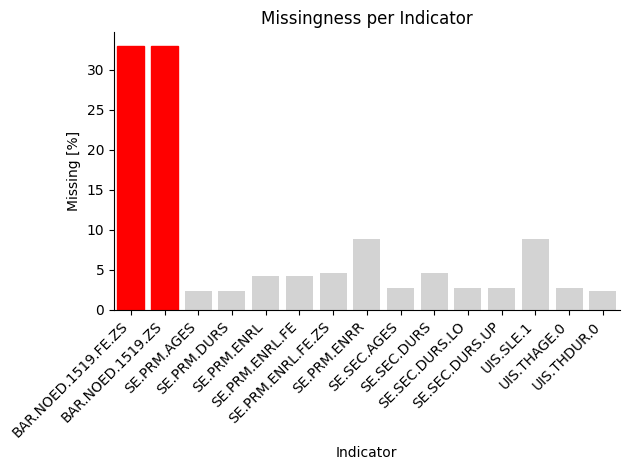

In [22]:
dff = df.iloc[:, 1:]
missing = pd.DataFrame(
    {
        "Indicator": dff.isna().sum().index,
        "Missing Values": dff.isna().sum().values,
        "Missing%": dff.isna().mean().values * 100,
    }
)

print(missing[:20])

# Plot only the first 20 rows to match the printed output
ax = sns.barplot(data=missing[:20], x="Indicator", y="Missing%", color="lightgray")

highlight = ["BAR.NOED.1519.ZS", "BAR.NOED.1519.FE.ZS"]
for bar, label in zip(ax.patches, missing[:20]["Indicator"]):
    if label in highlight:
        bar.set_color("red")

plt.ylabel("Missing [%]")
plt.title('Missingness per Indicator')
sns.despine()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Treat missing data 

In [23]:
cols = df.select_dtypes(
    include="number"
).columns.tolist()  # select the column to impute
df[cols] = df[cols].apply(
    lambda c: c.fillna(c.median())
)  # impute each column with the mean of it mean

display(df.isna().mean() * 100)  # cross checking the accuracy of the imputation

Country Name           0.0
BAR.NOED.1519.FE.ZS    0.0
BAR.NOED.1519.ZS       0.0
SE.PRM.AGES            0.0
SE.PRM.DURS            0.0
SE.PRM.ENRL            0.0
SE.PRM.ENRL.FE         0.0
SE.PRM.ENRL.FE.ZS      0.0
SE.PRM.ENRR            0.0
SE.SEC.AGES            0.0
SE.SEC.DURS            0.0
SE.SEC.DURS.LO         0.0
SE.SEC.DURS.UP         0.0
UIS.SLE.1              0.0
UIS.THAGE.0            0.0
UIS.THDUR.0            0.0
dtype: float64

## Missing Data Assessment

**High-Missingness Indicators:**  
BAR.NOED.1519.ZS (youth not in education, ages 15-19) and BAR.NOED.1519.FE.ZS (female youth not in education, ages 15-19) show 33% missingness. While education-related, these indicators have limited relevance to Academy's target market of high school and university-level learners and will be excluded from further analysis.

**Remaining Indicators:**  
Missingness ranges from 2-11% across all other indicators, indicating strong data quality that supports reliable imputation.

### Imputation Strategy

Missing values will be imputed using median substitution for each indicator. This approach is robust to outliers, preserves distributional characteristics, and introduces minimal bias given the low missingness levels. Median imputation maintains the integrity of correlation analyses without artificially inflating variance.

---


## Bivariate Relationship Analysis:
### Identifying Redundant Features

#### Correlation Analysis

Examine linear relationships between indicators using Pearson correlation to identify highly correlated pairs that may represent redundant information, enabling feature reduction without loss of analytical insight.

---

In [24]:
def corr_plots(corr, plot_title):
    # visualise the diffference
    plt.figure(figsize=(10, 5), dpi=150)
    sns.set_theme(style="white", font_scale=1.1)
    sns.heatmap(
        corr,
        cmap="coolwarm",
        mask=np.triu(np.ones_like(corr, dtype=bool)),
        center=0,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 6},
        linewidths=0.5,
        cbar_kws={"label": f"{plot_title}"},
    )
    plt.title(f"{plot_title} Correlations", fontsize=10, pad=12)
    plt.xticks(rotation=45, ha="right", fontsize=5)
    plt.yticks(fontsize=5)
    plt.tight_layout()
    plt.show()

## Pearson Correlation 

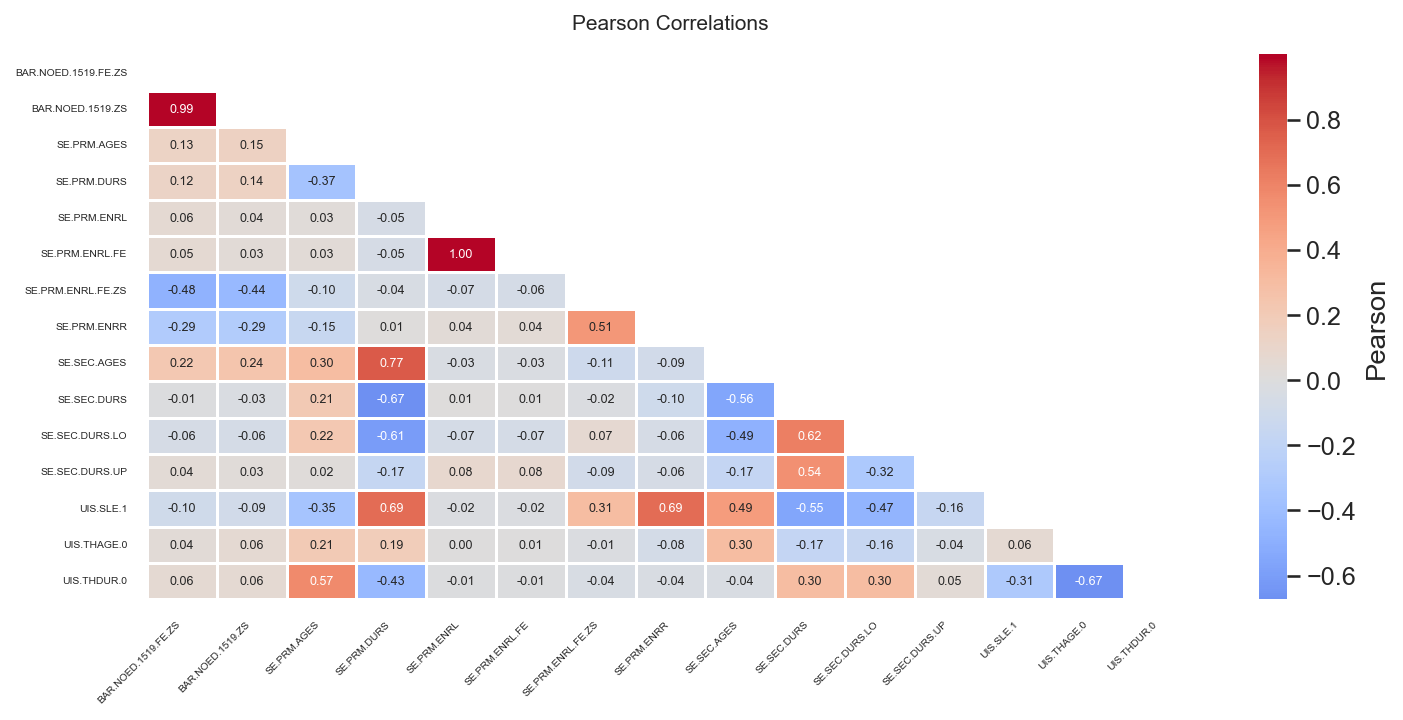

In [25]:
# Pearson Correlation
Pcorr=df.select_dtypes(include='number').corr(method="pearson")

corr_plots(Pcorr, plot_title="Pearson")

## Pearson Correlation Analysis

The correlation matrix reveals primarily weak to moderate relationships (r = -0.6 to +0.7) among education indicators, suggesting most metrics capture distinct dimensions of educational systems.

**Notable Correlations:**
- SE.SEC.AGES and SE.PRM.DURS (r ≈ 0.77): Strong positive relationship between secondary school entry age and primary education duration
- SE.SEC.DURS.LO and SE.SEC.DURS (r ≈ 0.62): Moderate correlation between lower and total secondary education duration

**Implication:**  
The generally low correlation structure indicates minimal redundancy across indicators, supporting retention of most metrics for comprehensive market assessment. The structural relationships between duration and age variables align with expected educational system design.

---

## Spearman Correlation 

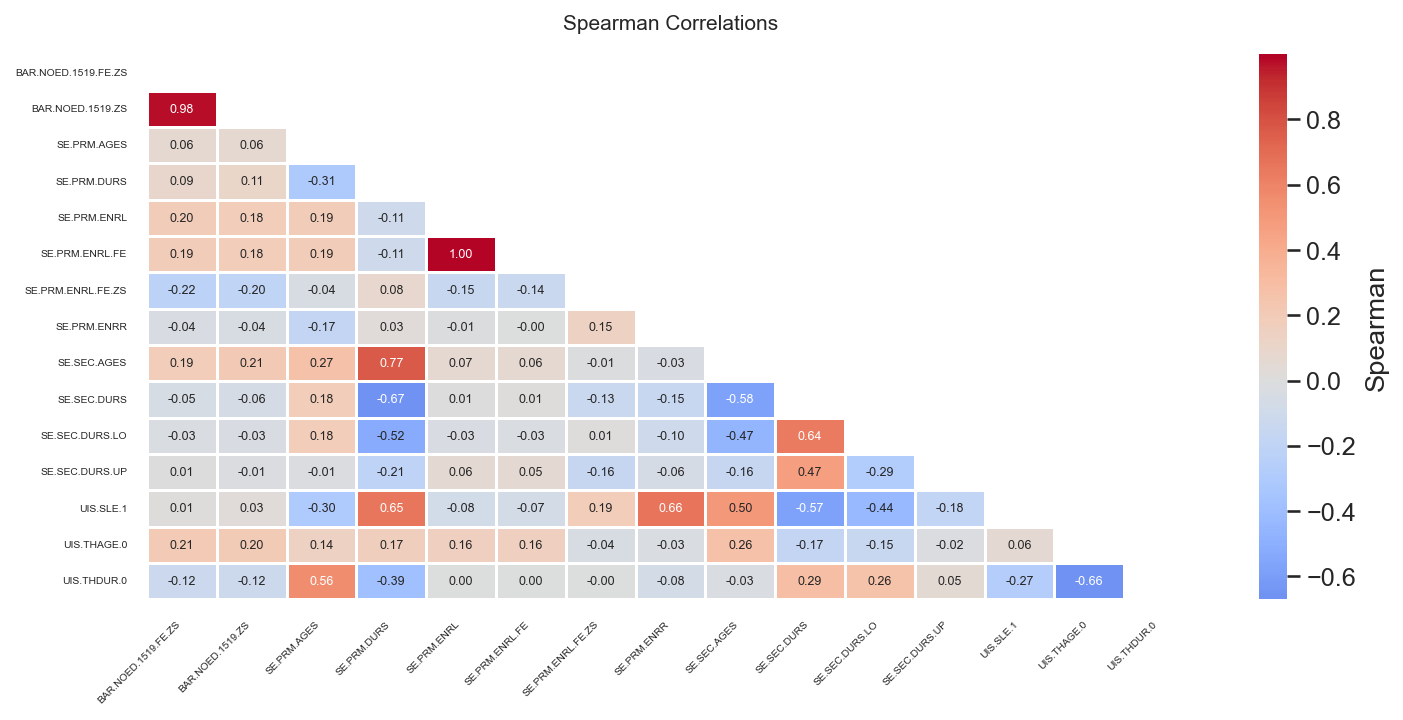

In [26]:
# Spearman Heatmap
SPcorr = df.select_dtypes(include='number').corr(method="spearman")

corr_plots(SPcorr, plot_title="Spearman")

## Correlation Structure Analysis

Most indicator pairs show moderate correlations (r = -0.6 to +0.6), indicating these metrics capture different dimensions of educational systems rather than redundant information.

**Key Relationships:**

*Positive correlations:*
- Primary duration and school life expectancy (r ≈ 0.65): Longer primary education associates with extended total schooling
- Lower and upper secondary durations (r ≈ 0.64): Structural consistency within secondary education systems

*Negative correlations:*
- Secondary vs. tertiary duration (r ≈ -0.66): Suggests potential trade-offs in education cycle allocation across system levels

**Implication:**  
The varied correlation structure confirms that indicators measure distinct educational characteristics. Limited redundancy supports retaining most metrics for comprehensive country profiling, though highly correlated pairs may be candidates for consolidation in subsequent analysis.

---

## Comparison of the two correlations 

Mean signed difference (|Pearson| - |Spearman|): 0.006


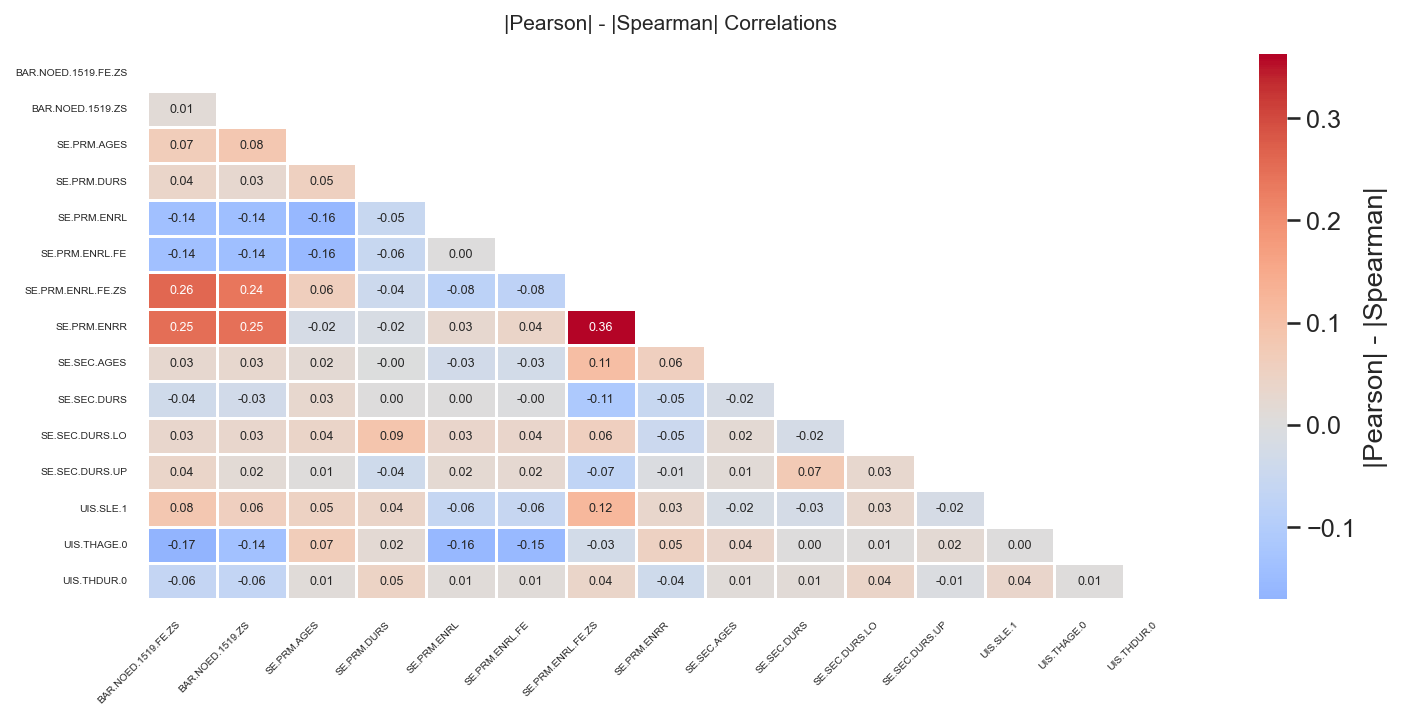

In [27]:
# Difference between Pearson and Spearman correlations
corr_diff = abs(Pcorr) - abs(SPcorr)

# Confirm which correlation method dominates
mean_signed_diff = corr_diff.mean().mean()
print(f"Mean signed difference (|Pearson| - |Spearman|): {mean_signed_diff:.3f}")
corr_plots(corr_diff, "|Pearson| - |Spearman|")

## Correlation Method Comparison

The difference between Pearson and Spearman correlations averages 0.003, indicating negligible divergence between linear and rank-based relationship measures.

**Finding:**  
Relationships among education indicators exhibit primarily linear patterns with minimal non-linear components. This consistency validates the use of Pearson correlation for subsequent analyses and suggests the data contains limited outlier influence or non-monotonic relationships.

---

## Pair Plots 

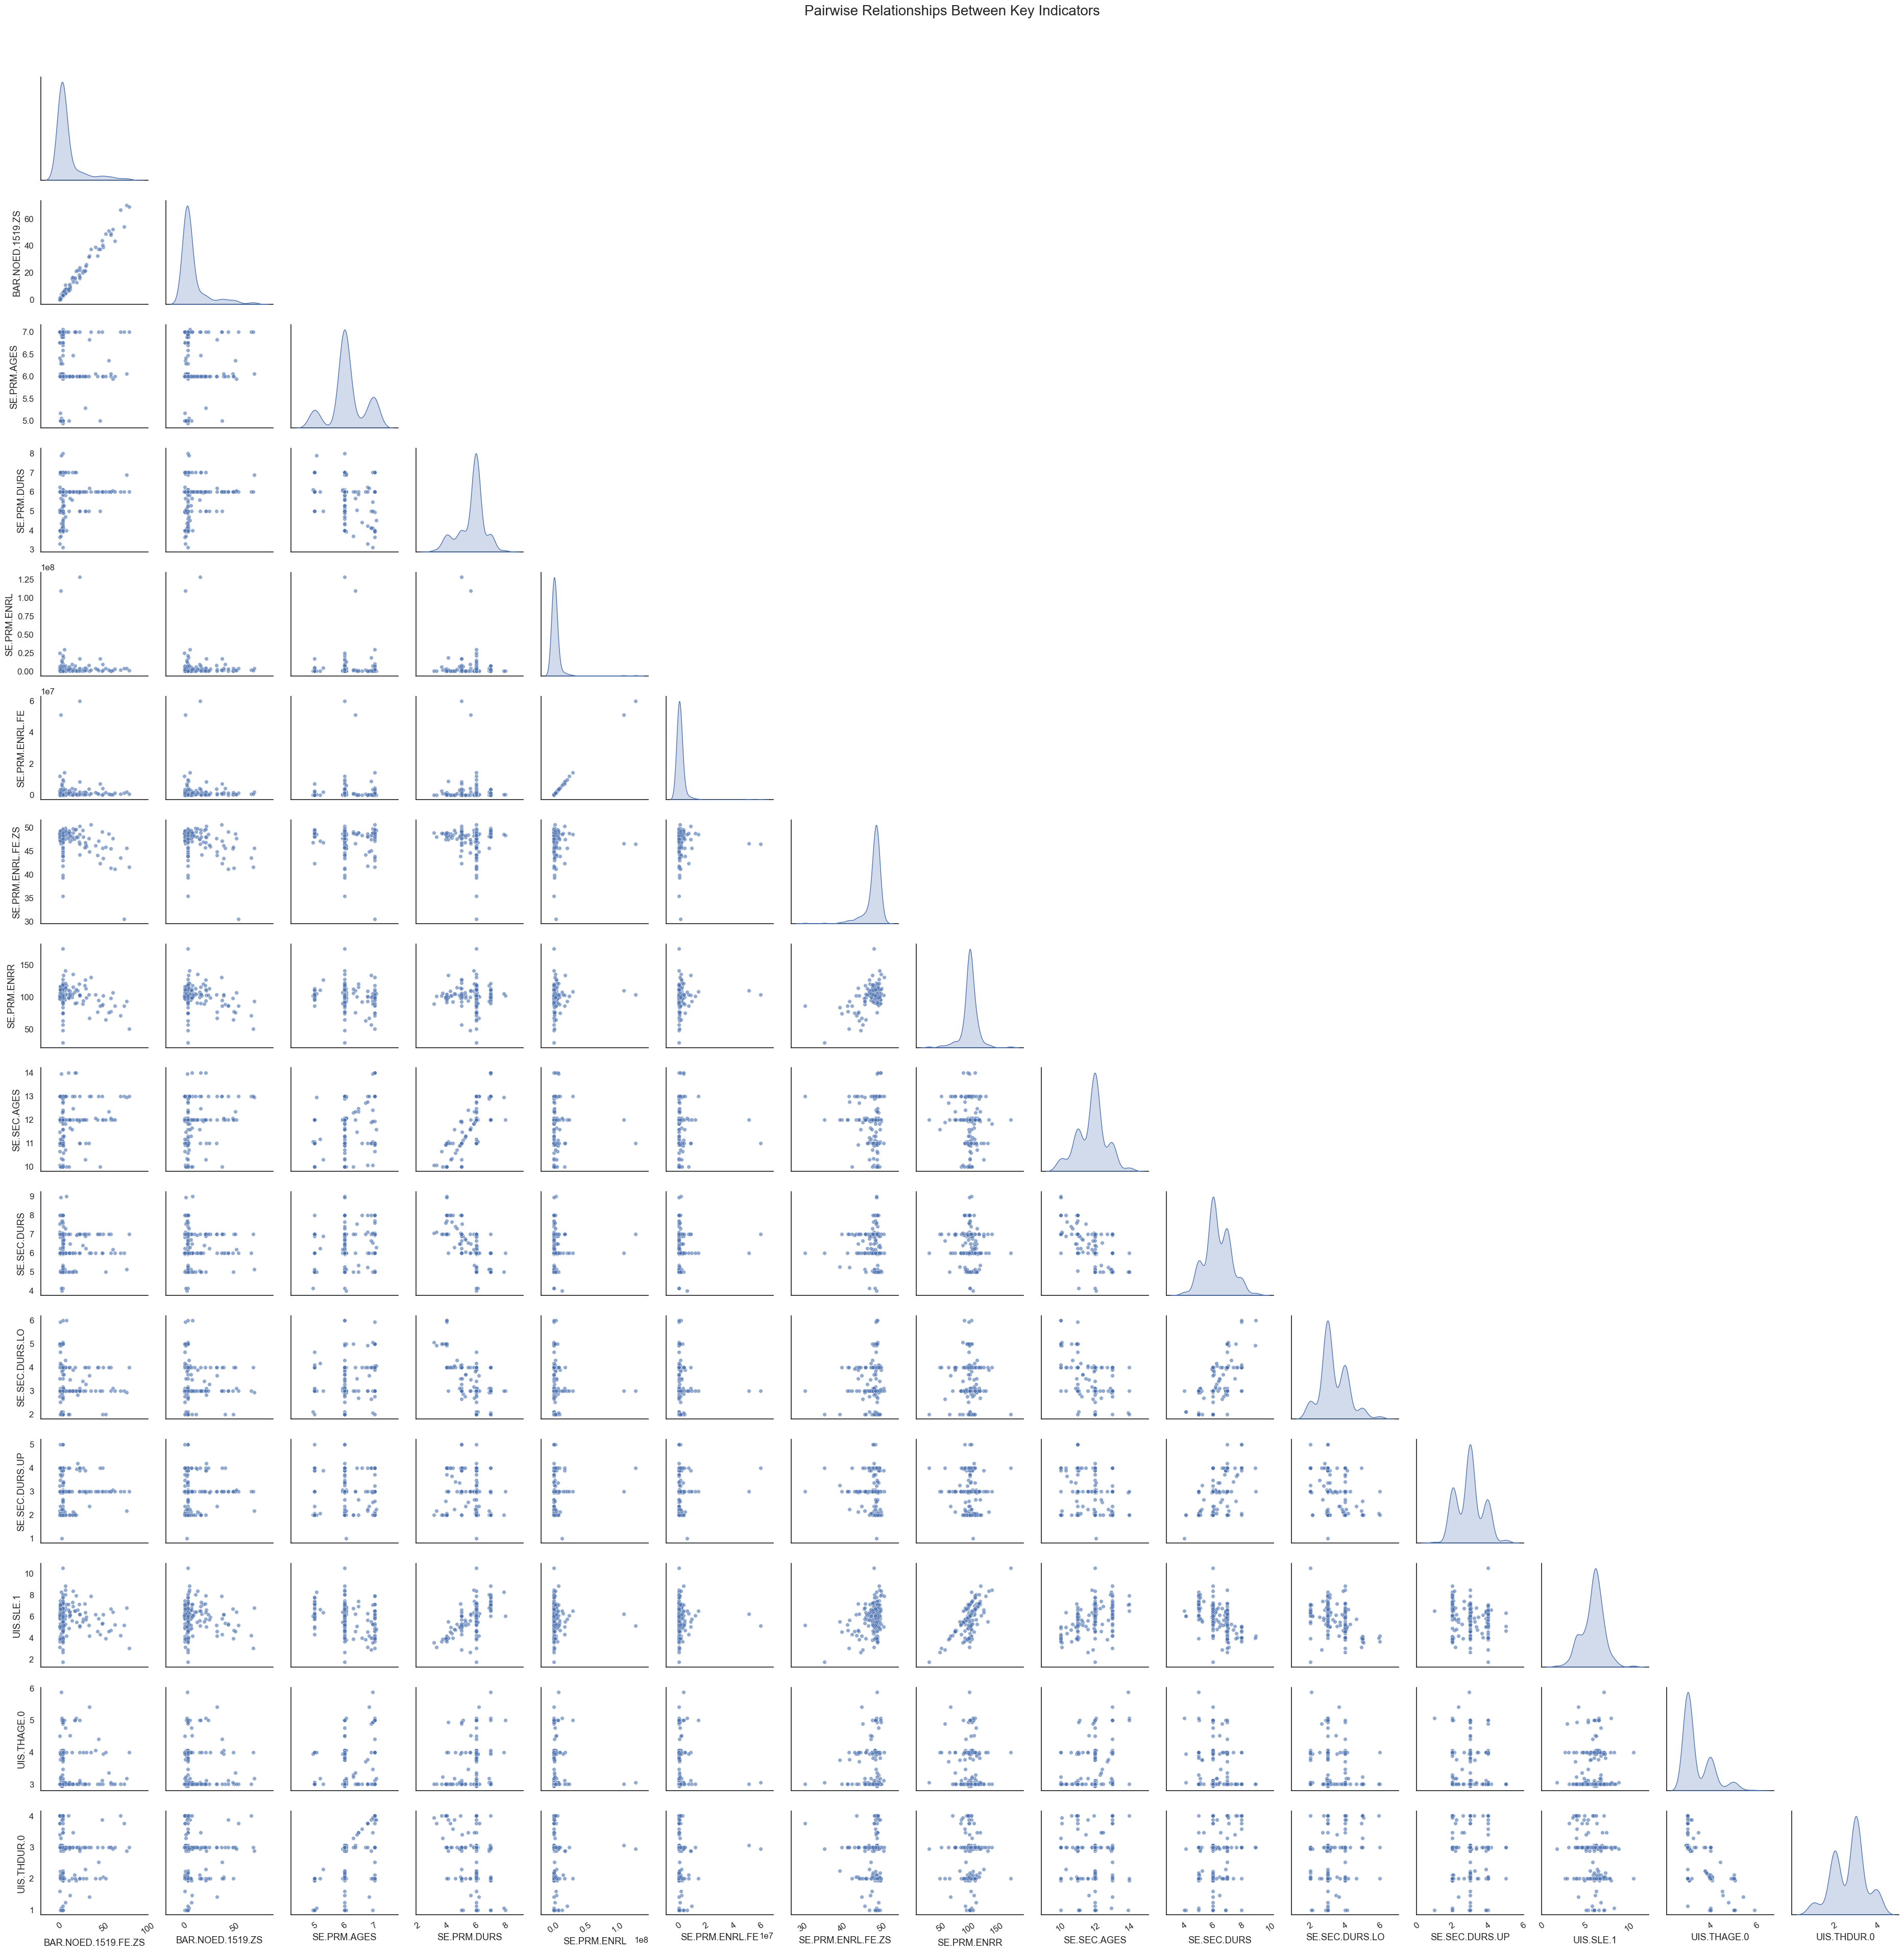

In [28]:
# Select the numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns

# Create the pairplot
sns.set_theme(style="white", font_scale=1.1)

g = sns.pairplot(
    df[numeric_cols],  # only numeric columns
    diag_kind="kde",  # smooth density on diagonal
    corner=True,  # lower triangle only (cleaner)
    plot_kws={
        "alpha": 0.6,  # transparency for overlapping points
        "s": 30,  # point size
    },
    diag_kws={"fill": True},  # smooth KDE curves
)

#
g.fig.suptitle("Pairwise Relationships Between Key Indicators", fontsize=20, y=1.02)
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis="x", rotation=35)
sns.despine()
plt.tight_layout()
plt.show()

## Bivariate Relationship Analysis

The pairplot reveals distribution characteristics and relationships across key education indicators.

**Distribution Patterns:**  
Most indicators exhibit right-skewed distributions, particularly enrollment and duration metrics, indicating that higher values are less common across countries.

**Relationship Structure:**
- Weak to moderate positive relationships dominate, especially between primary and secondary education metrics
- Largely linear patterns confirm minimal difference between Pearson and Spearman correlations
- Scatter in bivariate plots reflects cross-country variation in education system design and policy priorities

**Implication:**  
The predominantly linear relationships validate linear modeling approaches for subsequent analysis. Distributional skewness suggests potential value in normalized metrics for country comparisons, while relationship scatter highlights genuine diversity in educational approaches across markets.

---

## Correlation Analysis Summary

Pearson and Spearman correlation matrices show highly consistent results (mean difference = 0.003), with most relationships ranging from r = -0.6 to +0.6. This confirms indicators capture distinct yet complementary dimensions of educational systems.

**Key Findings:**

*Strong correlations:*
- SE.SEC.AGES and SE.PRM.DURS (r ≈ 0.77): Reflects standardized education system structure
- BAR.NOED.1519.ZS and BAR.NOED.1519.FE.ZS (r ≈ 0.99): Demonstrates internal data consistency

*Moderate correlations:*
- SE.PRM.ENRL.FE.ZS and SE.PRM.ENRR (r ≈ 0.5): Indicates balanced participation patterns

**Methodological Implication:**  
The minimal divergence between Pearson and Spearman methods confirms predominantly linear relationships. Pearson correlation will be used for primary analysis, with the consistency between methods validating this approach and confirming limited outlier influence.

---

### Elimination of highly Correlated Redundant Features 

In [29]:
ATI = (
    []
)  # Above threshold indicators / eliminating redundance indicators with pearson correlation above 0.7
for i in range(len(SPcorr)):
    for j in range(i):
        pair_corr = Pcorr.iloc[i, j]
        if abs(pair_corr) > 0.7:
            indicator1, indicator2 = Pcorr.columns[i], Pcorr.columns[j]
            ATI.append([indicator1, indicator2])
print(f'pairs of indicator: {ATI}')
# Creating list from from the above pairs of indicators
Investigate_Indicator = []
for indicator in ATI:
    for j in indicator:
        Investigate_Indicator.append(j)

print(Investigate_Indicator)

# Infer the significant of these indicators 
inffer_names = df_edstats_data.loc[df_edstats_data["Indicator Code"].isin(df.columns.tolist())][
    ["Indicator Code", "Indicator Name"]].drop_duplicates().reset_index(drop=True)
conf.pdconfig(cols_width=None)
inffer_names

pairs of indicator: [['BAR.NOED.1519.ZS', 'BAR.NOED.1519.FE.ZS'], ['SE.PRM.ENRL.FE', 'SE.PRM.ENRL'], ['SE.SEC.AGES', 'SE.PRM.DURS']]
['BAR.NOED.1519.ZS', 'BAR.NOED.1519.FE.ZS', 'SE.PRM.ENRL.FE', 'SE.PRM.ENRL', 'SE.SEC.AGES', 'SE.PRM.DURS']


Pandas config display options set.

,Indicator Code,Indicator Name
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with no education
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 with no education
2,SE.PRM.ENRL,"Enrolment in primary education, both sexes (number)"
3,SE.PRM.ENRL.FE,"Enrolment in primary education, female (number)"
4,SE.PRM.ENRR,"Gross enrolment ratio, primary, both sexes (%)"
5,SE.SEC.AGES,Official entrance age to lower secondary education (years)
6,UIS.THAGE.0,Official entrance age to pre-primary education (years)
7,SE.PRM.AGES,Official entrance age to primary education (years)
8,SE.PRM.ENRL.FE.ZS,Percentage of students in primary education who are female (%)
9,UIS.SLE.1,"School life expectancy, primary, both sexes (years)"


## Remove redundancy 

In [30]:
RedIndicatordrop_list = ["SE.PRM.ENRL.FE", "SE.SEC.AGES"]  #the redundant list
df = df.drop(columns=RedIndicatordrop_list)

# saving th processed data into files 
file_saver.save_process_files("summarised_table_final_tab", df, path="processed")

# The head of the processed data
df.head()

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/processed/summarised_table_final_tab.csv


,Country Name,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,SE.PRM.AGES,SE.PRM.DURS,SE.PRM.ENRL,SE.PRM.ENRL.FE.ZS,SE.PRM.ENRR,SE.SEC.DURS,SE.SEC.DURS.LO,SE.SEC.DURS.UP,UIS.SLE.1,UIS.THAGE.0,UIS.THDUR.0
0,Afghanistan,73.433,54.110,7.0,6.000,3.927e+06,30.599,86.239,6.000,3.000,3.000,5.190,3.000,3.765
1,Albania,1.865,2.478,6.0,4.353,2.382e+05,47.849,102.477,7.647,4.000,3.647,4.431,3.000,3.000
2,Algeria,11.515,7.650,6.0,5.647,4.120e+06,47.091,109.569,6.471,3.471,3.000,6.126,4.529,1.471
3,American Samoa,3.429,3.435,6.0,6.118,5.178e+05,48.411,102.535,6.000,3.000,2.000,6.030,3.000,3.000
4,Andorra,3.429,3.435,6.0,5.941,4.247e+03,47.317,102.535,6.059,4.000,2.059,6.030,3.000,3.000


## Feature Reduction: Removing Redundant Indicators

Correlation analysis identified pairs of indicators with substantial overlap. To minimize multicollinearity and improve analytical clarity, the following variables were removed:

**SE.PRM.ENRL.FE (Primary enrollment, female):**  
Excluded due to high correlation with total primary enrollment (r > 0.7). The aggregate metric captures overall participation patterns without gender-specific redundancy.

**SE.SEC.AGES (Secondary school entry age):**  
Removed due to strong correlation with primary education duration (r ≈ 0.77). Primary duration serves as the more fundamental structural indicator with greater cross-country comparability.

**Result:**  
The reduced indicator set maintains analytical coverage while eliminating redundant information that could distort subsequent analyses.

---

## Indicator Classification: Current Infrastructure vs. Growth Potential

In [31]:
# Present Readiness Indicators
ready_market = {
    "SE.SEC.DURS.LO": "Theoretical duration of lower secondary education (years)",
    "SE.SEC.DURS": "Theoretical duration of secondary education (years)",
    "SE.SEC.DURS.UP": "Theoretical duration of upper secondary education (years)"
}

# Potential Growth Indicators
potential_market = {
    "UIS.SLE.1": "School life expectancy, primary, both sexes (years)",
    "SE.PRM.ENRL": "Enrolment in primary education, both sexes (number)",
    "SE.PRM.ENRR": "Gross enrolment ratio, primary, both sexes (%)",
    "SE.PRM.AGES": "Official entrance age to primary education (years)",
    "SE.PRM.ENRL.FE.ZS": "Percentage of students in primary education who are female (%)",
    "SE.PRM.DURS": "Theoretical duration of primary education (years)",
    "UIS.THAGE.0": "Official entrance age to pre-primary education (years)",
    "UIS.THDUR.0": "Theoretical duration of pre-primary education (years)"

}

## Rationale: Market Segmentation Strategy

### Strategic Framework

To prioritize international expansion targets, we classify countries into two strategic categories based on education system maturity:

#### **Ready Markets** (Established Secondary Education Systems)
Countries with developed secondary education infrastructure represent **immediate expansion opportunities**. These markets demonstrate:
- **Institutional stability**: Established secondary school systems
- **Target demographic presence**: Students already progressing through structured education pathways
- **Lower entry barriers**: Existing educational frameworks to integrate with

**Selected Indicators:**
- Secondary education duration metrics (lower, upper, and total)
- *Rationale*: Countries with formalized secondary programs indicate mature education systems ready for supplementary services like Mark's Academy

#### **Potential Markets** (Emerging Primary Education Focus)
Countries investing in primary education infrastructure represent **long-term growth opportunities**. These markets show:
- **Growing education sector**: Expanding primary enrollment and access
- **Future pipeline**: Today's primary students are tomorrow's secondary students
- **Development trajectory**: Investment in foundational education signals commitment to system growth

**Selected Indicators:**
- Primary enrollment numbers and ratios
- School life expectancy
- Gender parity metrics
- Pre-primary and primary education structure

*Rationale*: High primary enrollment today predicts secondary education demand in 5-10 years, allowing strategic early positioning in emerging markets

### Business Implications

- **Ready Markets**: Target for immediate expansion (2-3 year horizon)
- **Potential Markets**: Monitor for future opportunities (5-10 year horizon)
- **Portfolio Approach**: Balance quick wins with long-term strategic positioning

## Step  Basic Statistical Description of the Remaining Indicators 

In [32]:
def visualise_numeric_features(df=df, figsize=(15, 5)):

    # Identify numeric columns if not provided
    numeric_cols = df.select_dtypes(include="number").columns.tolist()

    if not numeric_cols:
        print("No numeric columns found.")
        return

    # Loop through numeric columns
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 3, figsize=figsize, dpi=120)
        fig.suptitle(f"{col}", fontsize=14, fontweight="bold")

        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[0], color="blue")
        axes[0].set_title("Histogram", fontsize=12)
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")

        # Boxplot
        sns.boxplot(
            data=df,
            x=col,
            ax=axes[1],
            color="lightgreen",
            flierprops=dict(marker="o", markerfacecolor="red", markersize=5),
        )
        axes[1].set_title("Boxplot", fontsize=12)
        axes[1].set_xlabel(col)

        # Q-Q plot
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[2])
        axes[2].set_title("Q-Q Plot", fontsize=12)
        sns.despine()

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

## Statistical Description 

In [33]:
numerical_df = df.select_dtypes(include="number")
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAR.NOED.1519.FE.ZS,215.0,9.537e+00,1.588e+01,0.117,1.874,3.429,6.399e+00,7.888e+01
BAR.NOED.1519.ZS,215.0,8.596e+00,1.355e+01,0.117,2.089,3.435,6.679e+00,6.985e+01
SE.PRM.AGES,215.0,6.103e+00,5.584e-01,4.941,6.000,6.000,6.176e+00,7.059e+00
SE.PRM.DURS,215.0,5.719e+00,8.616e-01,3.118,5.176,6.000,6.000e+00,8.000e+00
SE.PRM.ENRL,215.0,3.173e+06,1.201e+07,1407.333,111457.630,517770.284,2.346e+06,1.285e+08
SE.PRM.ENRL.FE.ZS,215.0,4.776e+01,2.299e+00,30.599,47.741,48.411,4.878e+01,5.060e+01
SE.PRM.ENRR,215.0,1.020e+02,1.420e+01,29.202,99.001,102.535,1.069e+02,1.752e+02
SE.SEC.DURS,215.0,6.320e+00,8.817e-01,4.000,6.000,6.000,7.000e+00,9.000e+00
SE.SEC.DURS.LO,215.0,3.359e+00,7.843e-01,2.000,3.000,3.000,4.000e+00,6.000e+00
SE.SEC.DURS.UP,215.0,2.966e+00,7.312e-01,1.000,2.206,3.000,3.243e+00,5.000e+00


### Summary of Key Education Indicators

**Scope**: 215 countries providing global coverage of education systems, participation rates, and learner progression.

#### Education Structure (System Design)

- **Primary education**: Begins at age 6 (mean = 6.10), lasting ~6 years (mean = 5.72)—highly standardized globally
- **Secondary education**: Averages 6.3 years total, split into 3.4 years lower and 3.0 years upper secondary—consistent worldwide
- **Tertiary education**: Starts around level 3-4, lasting ~3 years—aligned with undergraduate programs

#### Access and Participation

- **Universal primary coverage**: Mean enrollment rate of 102% indicates near-universal access
- **Gender equity**: 47.76% female participation in primary education reflects balanced access
- **Persistent gaps**: Youth (15-19) with no education averages 8.6% (median 3.4%), but reaches 69.85% in some countries

#### System Maturity

- **School life expectancy**: 5.86 years average suggests moderate-to-strong progression through formal education
- **Structural consistency**: Standardized entry ages and durations indicate stable, mature education systems globally

**Implication**: High uniformity in structure and strong primary participation provide a stable foundation for targeting secondary education markets.

## Visualise the Distribution 

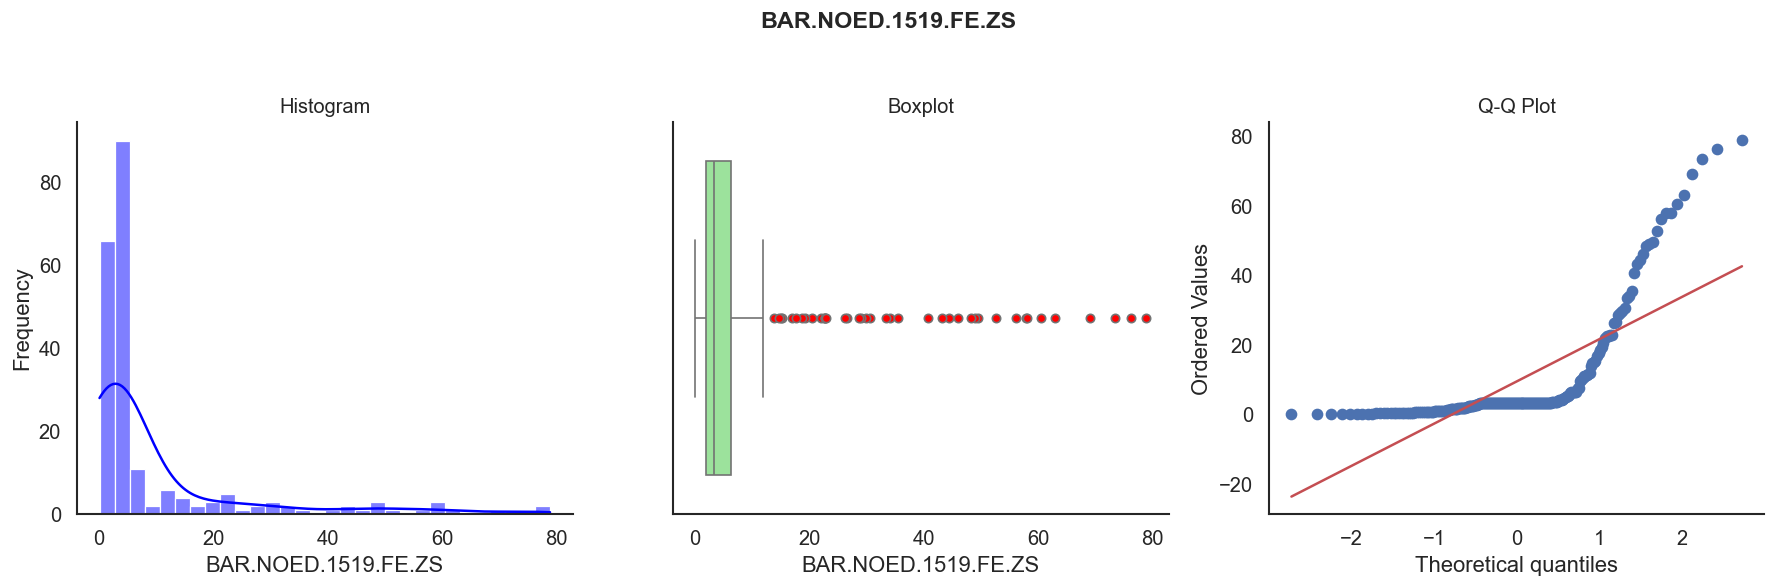

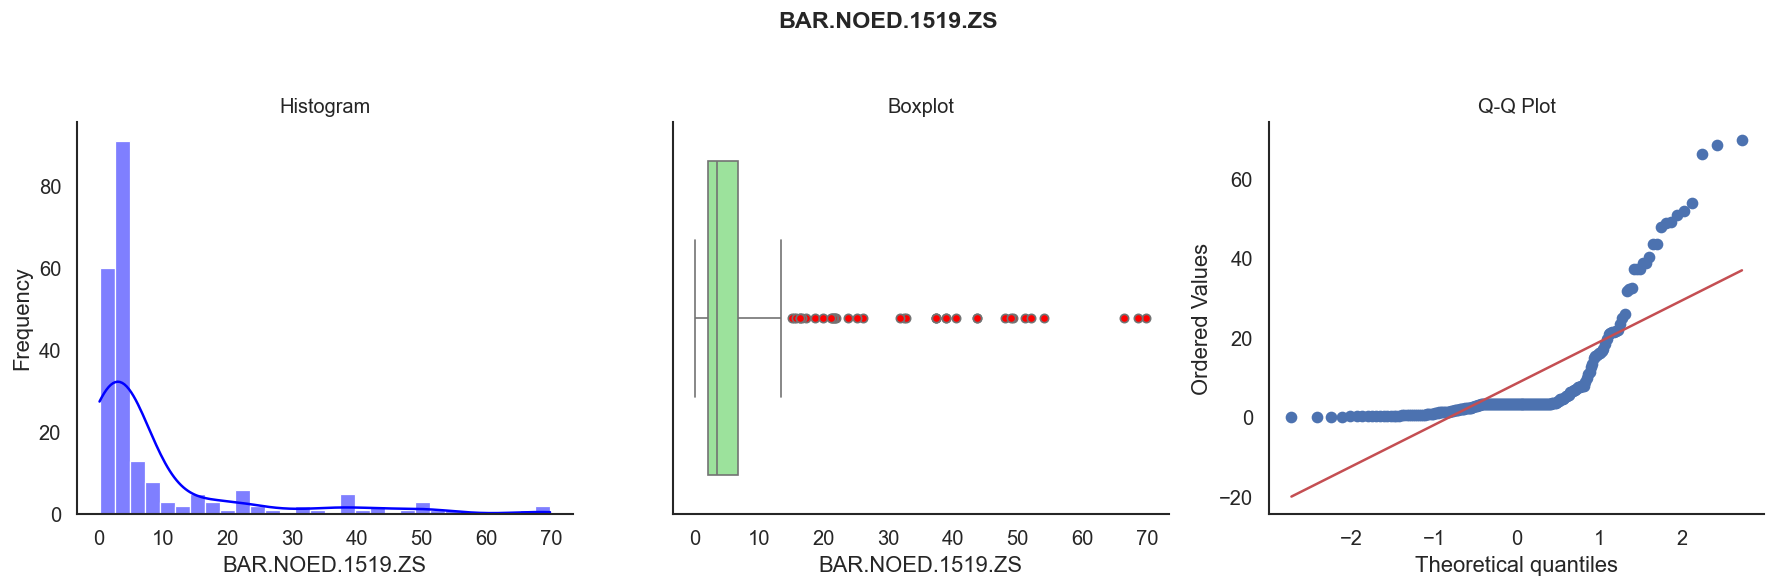

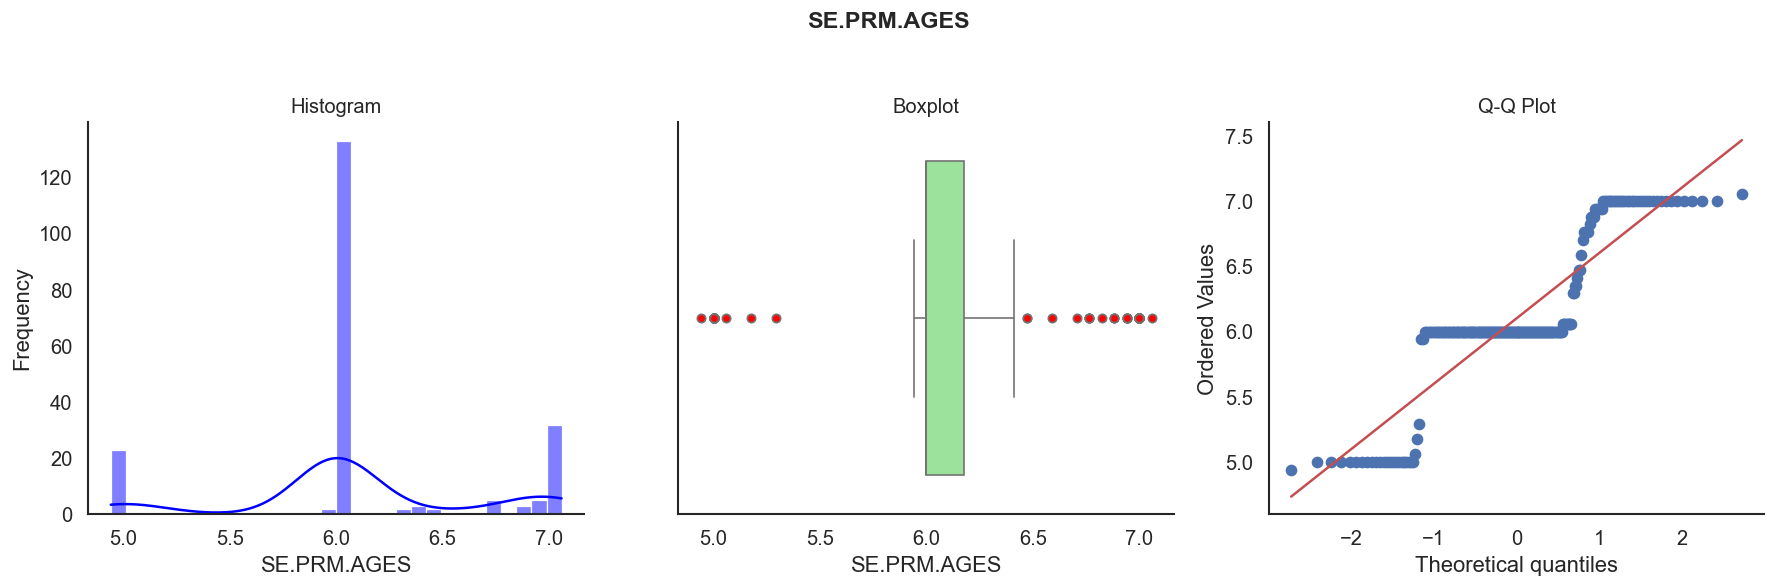

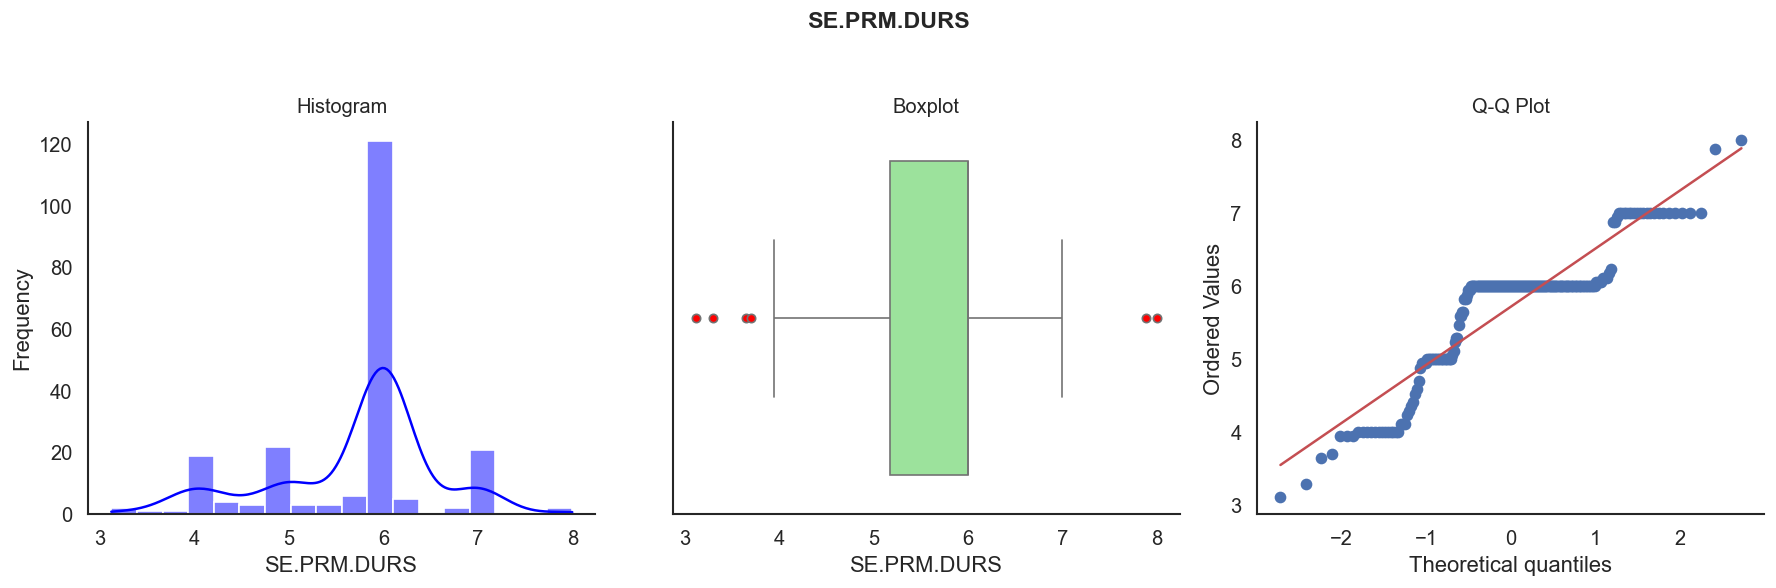

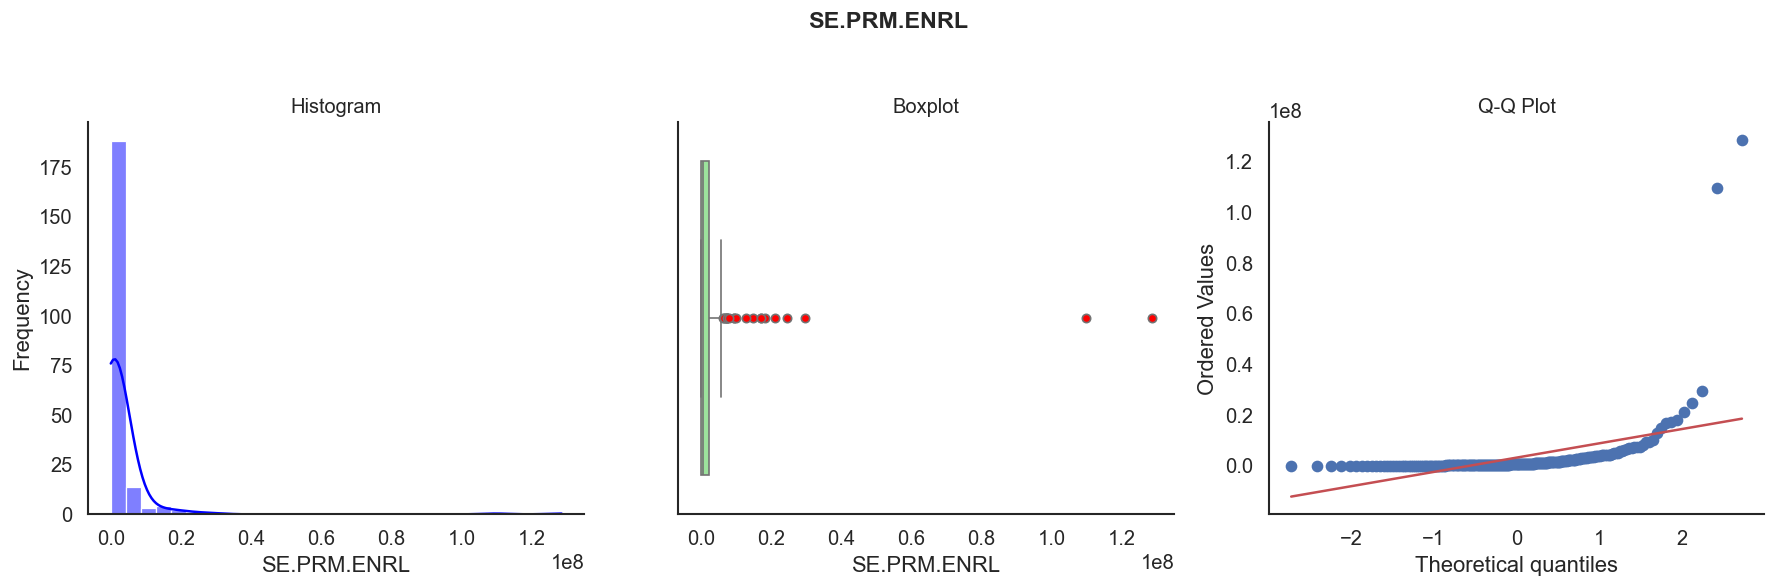

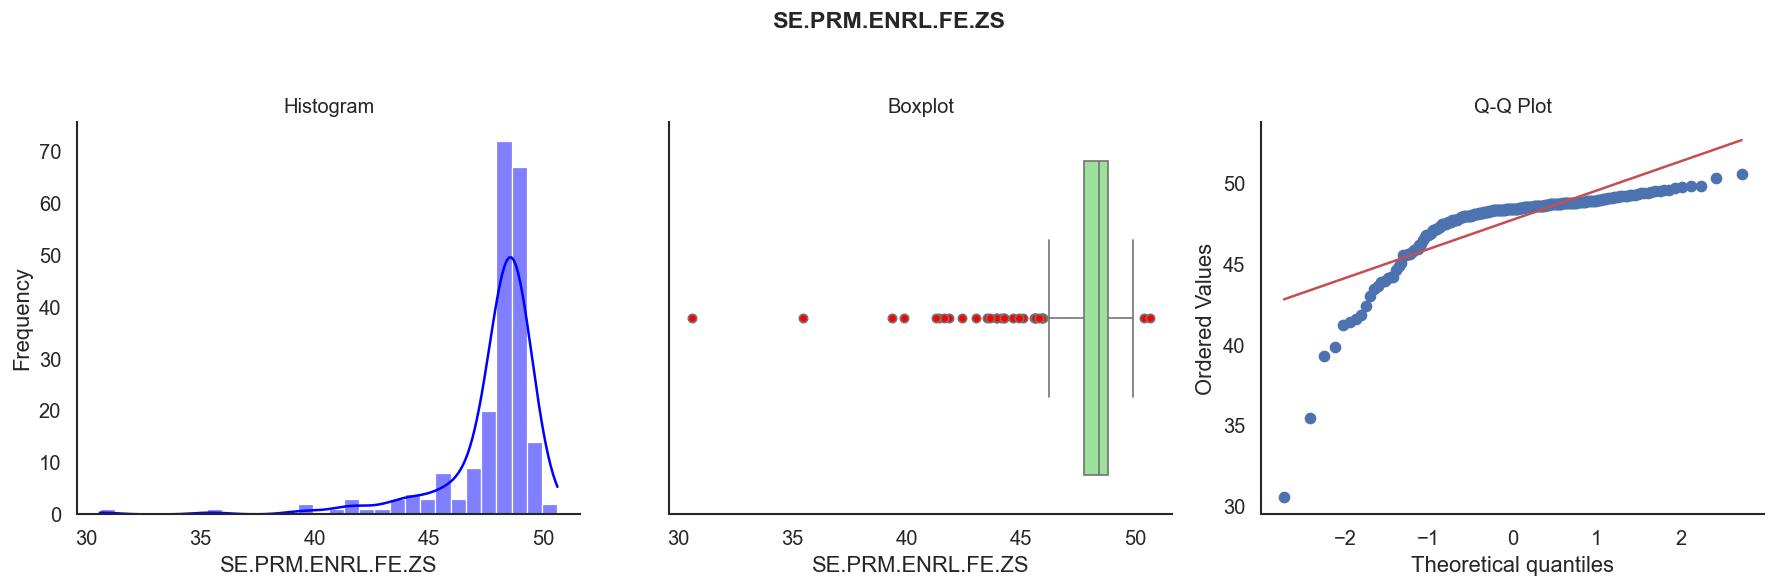

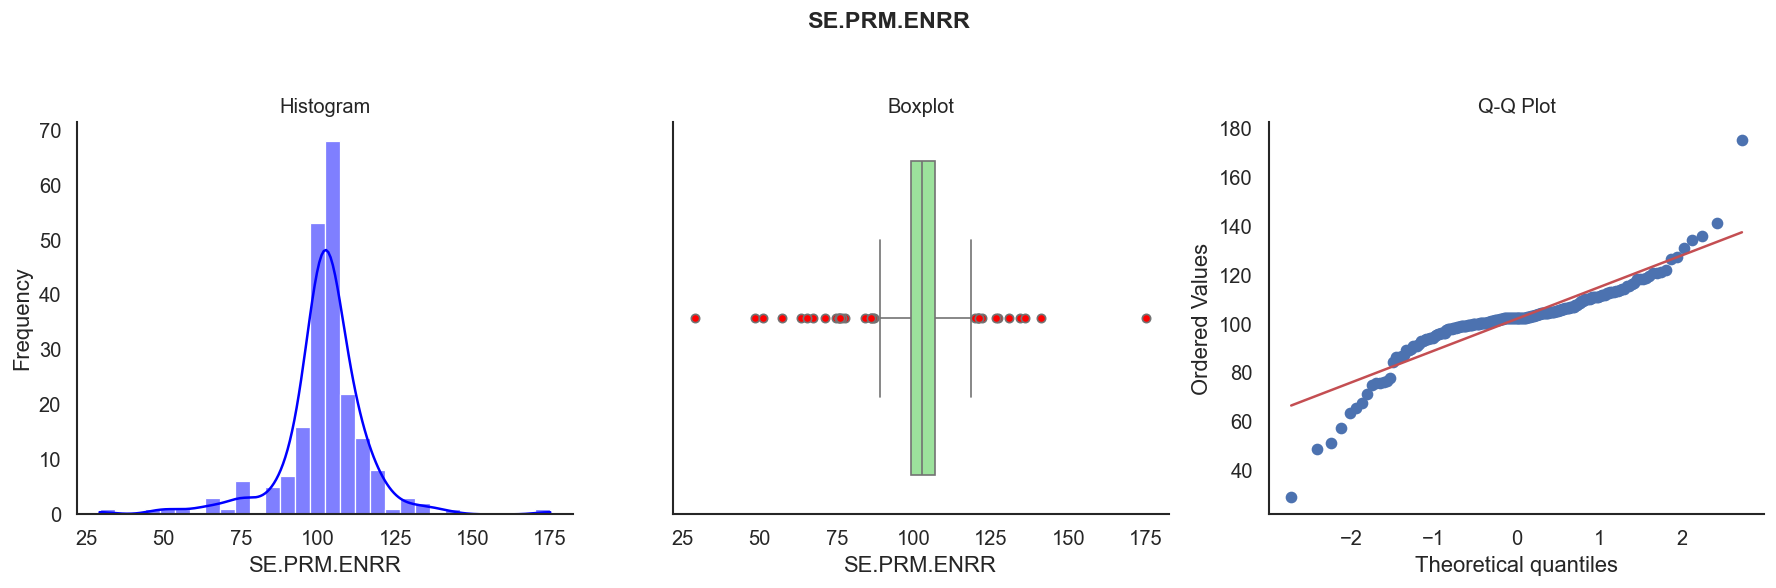

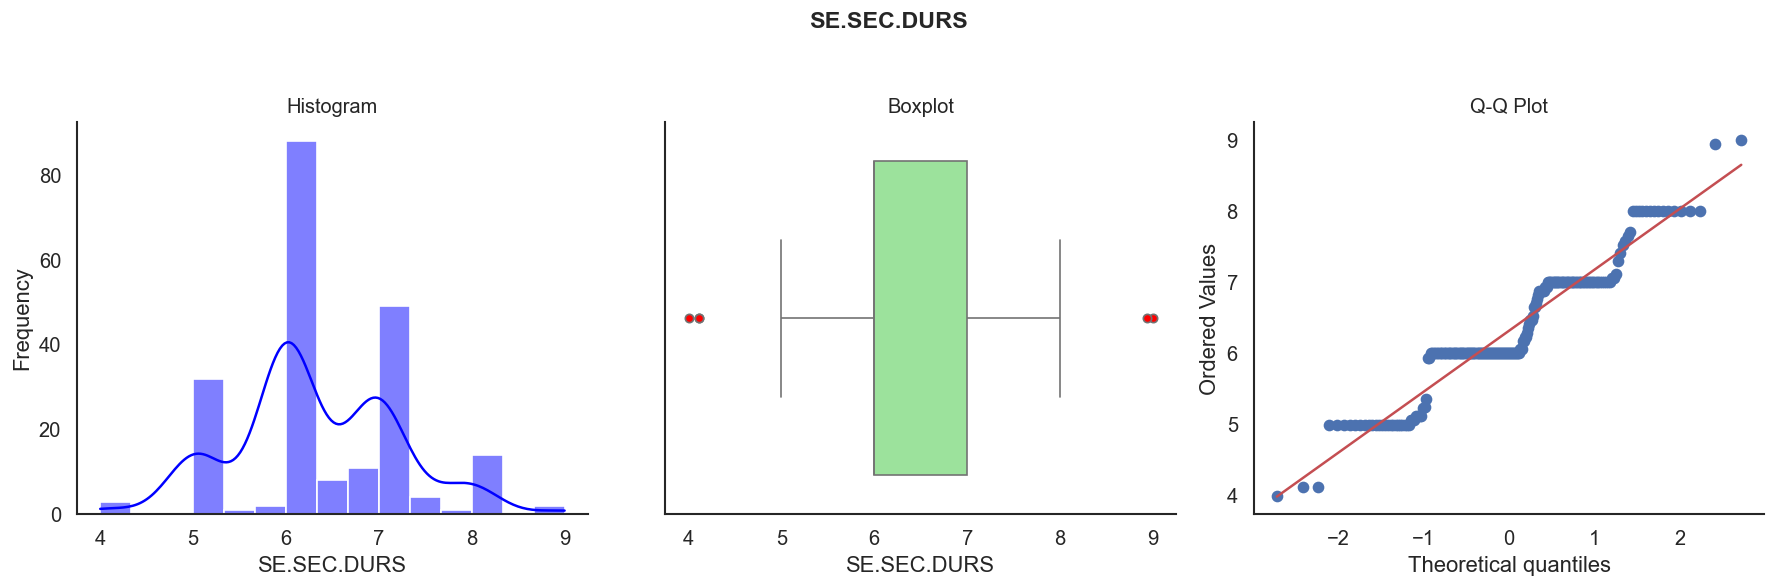

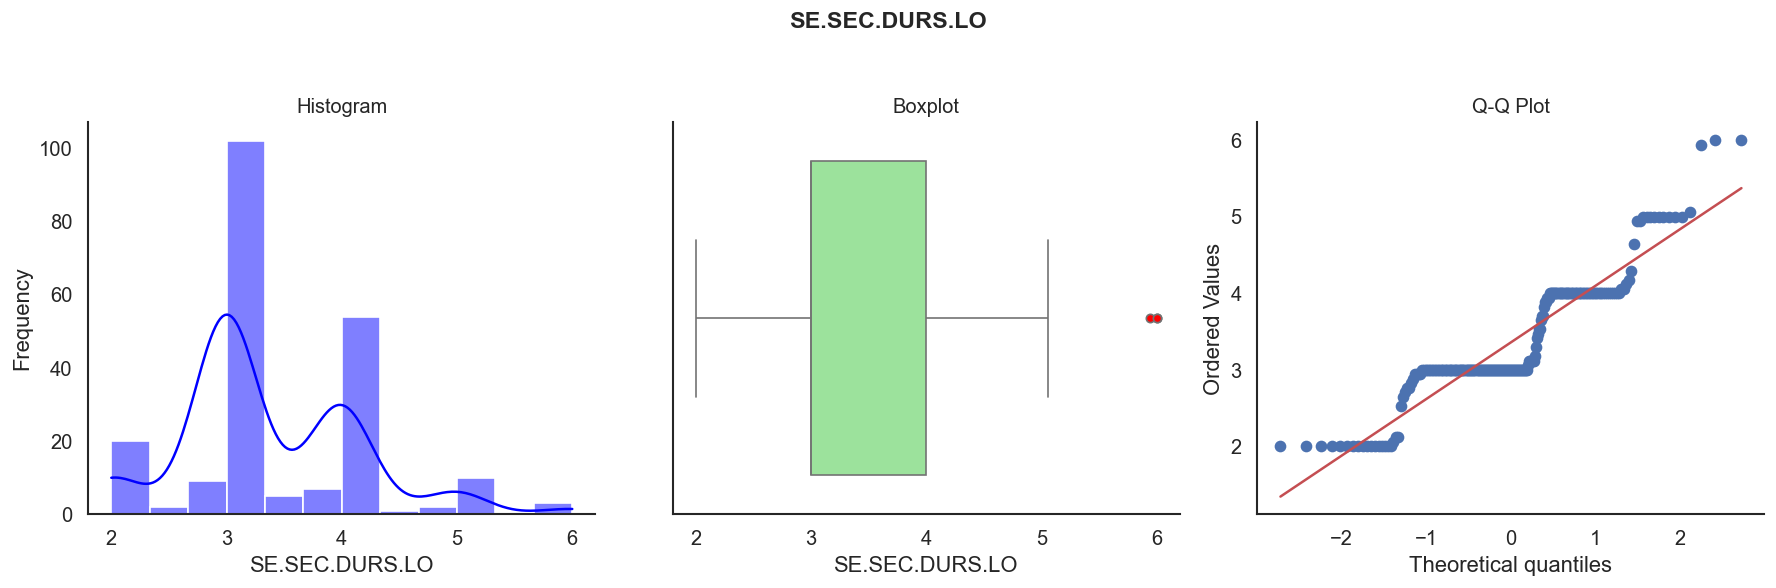

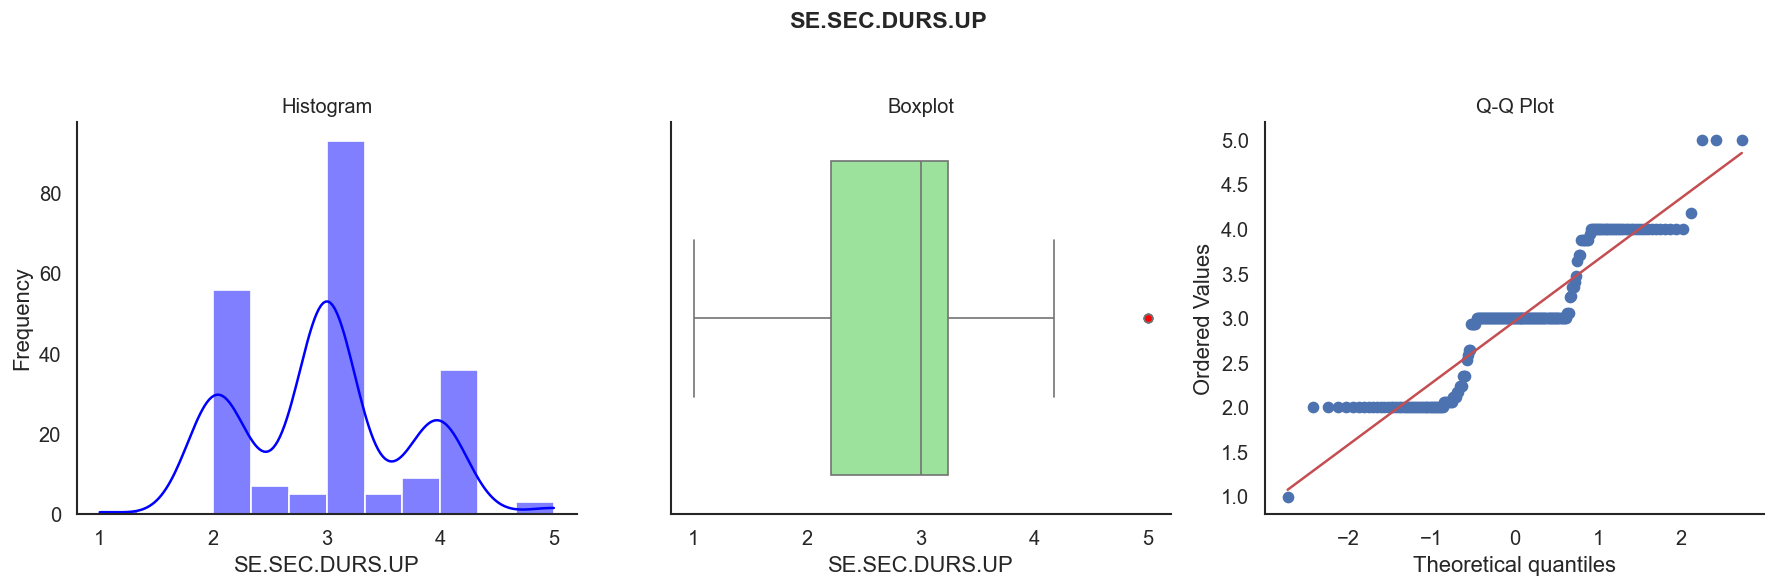

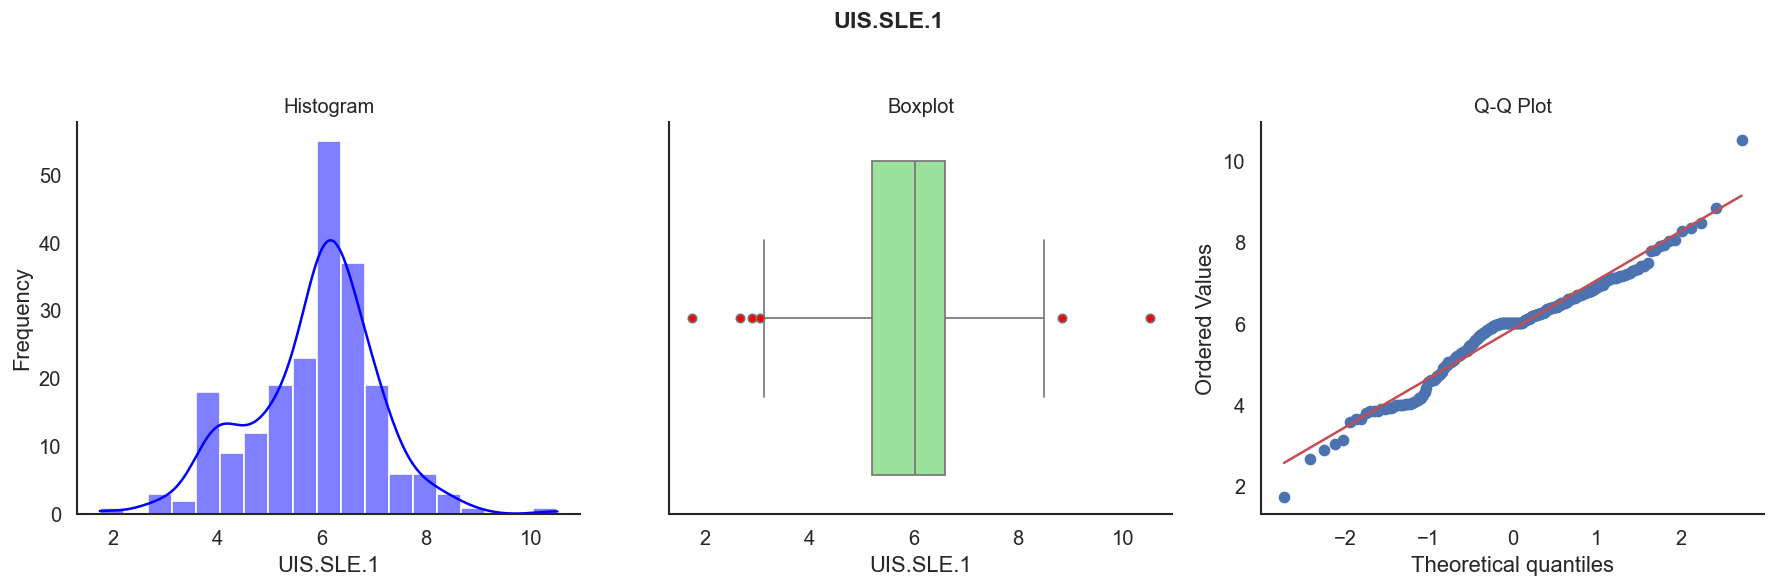

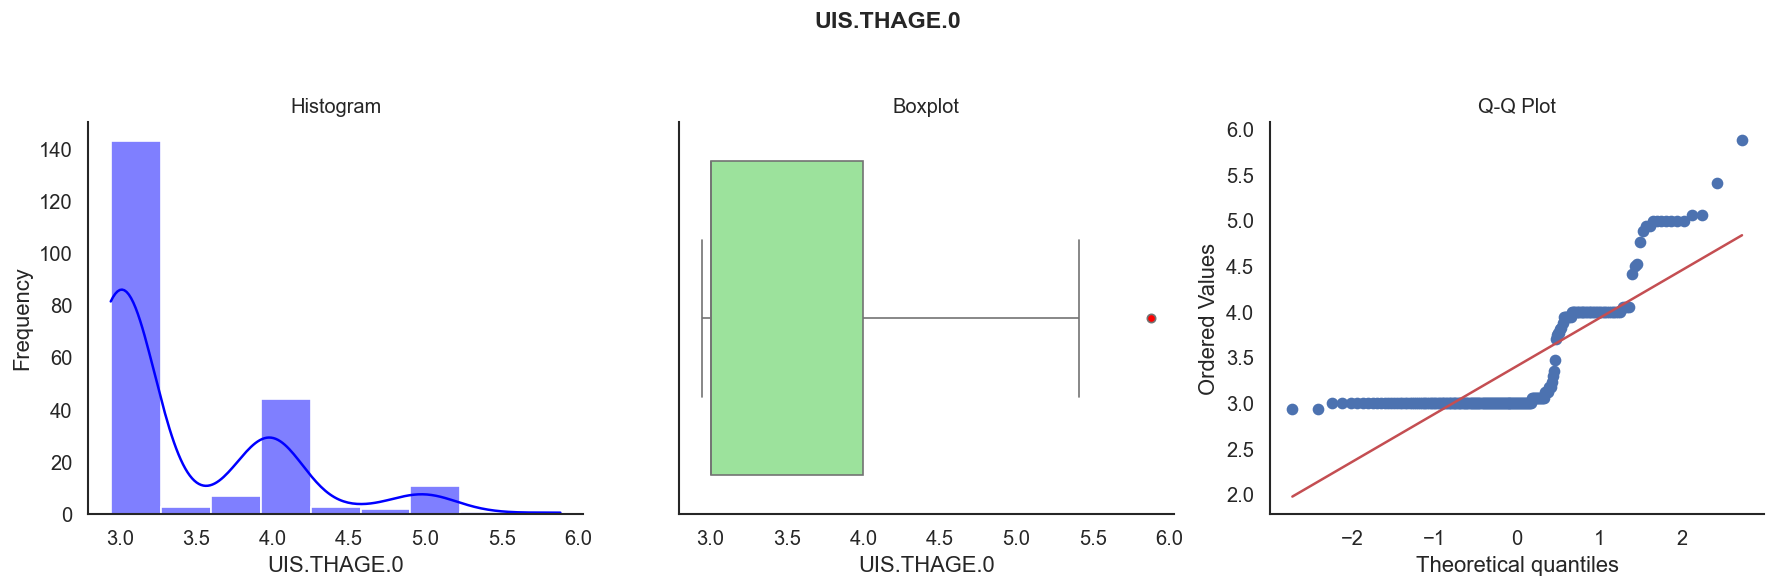

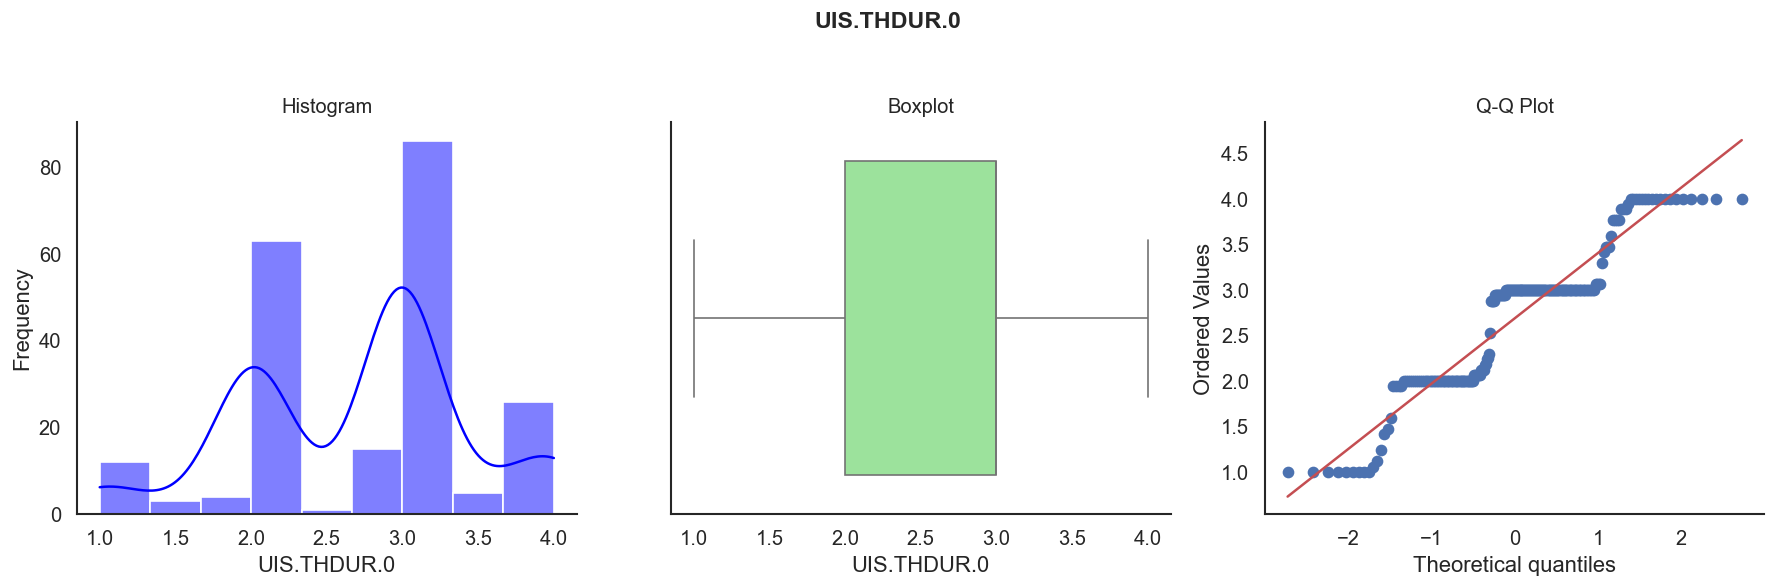

In [34]:
visualise_numeric_features(numerical_df, figsize=(15, 5))

## **Indicator Distributions and Insights for Market Expansion**

### **Primary Education Indicators**

**Primary School Entry Age (SE.PRM.AGES)**  
The distribution is highly concentrated around age six, with minimal variation (5–7 years). This reflects a globally consistent entry standard, simplifying age-based targeting for early education programs.

**Primary Education Duration (SE.PRM.DURS)**  
Predominantly clustered at five to six years, with limited outliers. This predictable structure enables scalable learning models across diverse markets.

**Primary Enrollment (SE.PRM.ENRL)**  
Exhibits strong right skewness, driven by population differentials—larger nations dominate absolute figures. This indicator serves as a market size proxy rather than a performance metric, making it valuable for scaling analysis.

**Female Enrollment Share (SE.PRM.ENRL.FE.ZS)**  
Centered around 47–49%, indicating balanced gender participation and broad parity in primary education access globally.

**Primary Enrollment Rate (SE.PRM.ENRR)**  
Approximates a normal distribution around 100%, with select countries exceeding 120%. This demonstrates widespread achievement of universal primary enrollment.

---

### **Secondary Education Indicators**

**Lower Secondary Duration (SE.SEC.DURS.LO)**  
Concentrated between three and four years, though outliers extend to six years. This regional variation presents opportunities for adaptive curriculum design.

**Upper Secondary Duration (SE.SEC.DURS.UP)**  
Primarily ranges from two to four years with slight right skewness. This variability supports flexible alignment of secondary programs across markets.

---

### **Progression and Tertiary Indicators**

**School Life Expectancy (UIS.SLE.1)**  
Shows a moderately right-skewed distribution around six years, reflecting steady learner progression and moderate education continuity.

**Tertiary Entry Age (UIS.THAGE.0)**  
Tightly clustered near 3–4 index units with minimal deviation, indicating standardized tertiary entry patterns that facilitate higher education planning.

**Tertiary Duration (UIS.THDUR.0)**  
Typically spans two to three years, revealing globally consistent undergraduate program lengths—a useful benchmark for international course design.



## **Market Readiness Assessment: Secondary Education Infrastructure**

### Normalize all numerical indicators for cross-country market opportunity ranking

In [35]:
cols =df.select_dtypes(include='number').columns.tolist()

def normalize_indicators(col):
    """
    Apply min-max normalization to scale indicators between 0 and 1.
    
    Parameters:
    col (pd.Series): Column to normalize
    
    Returns:
    pd.Series: Normalized column values
    """
    return (col - col.min()) / (col.max() - col.min())

# normalise the columns for easy comparison 
for col in cols:
    df[col] = normalize_indicators(df[col])


## Plot of Top 10 ready market countries 

In [36]:
# Columns for the ready market 
ready_market_cols = [ready for ready,_ in ready_market.items()]
ready_market_cols_labels = [ready for _,ready in ready_market.items()]

print(ready_market_cols )

# 
ready_market_df = df[["Country Name"] + ready_market_cols].copy()

# Equal weights or customize them based on importance
ready_market_df["Readiness_Index"] = (
    0.25 * ready_market_df["SE.SEC.DURS.LO"] +         # Theoretical duration of lower secondary education (years) 
    0.5 * ready_market_df["SE.SEC.DURS"] +             # Theoretical duration of secondary education (years)
    0.25 * ready_market_df["SE.SEC.DURS.UP"]           # Theoretical duration of upper secondary education (years)
)

# 
ready_market_df = (
    ready_market_df.sort_values(by = 'Readiness_Index', ascending=False)
    .reset_index(drop=True)
)


ready_market_df.head()

['SE.SEC.DURS.LO', 'SE.SEC.DURS', 'SE.SEC.DURS.UP']


,Country Name,SE.SEC.DURS.LO,SE.SEC.DURS,SE.SEC.DURS.UP,Readiness_Index
0,Germany,1.000,1.000,0.50,0.875
1,Slovak Republic,0.735,0.988,0.75,0.865
2,San Marino,0.250,0.800,1.00,0.713
3,"Macedonia, FYR",0.500,0.800,0.75,0.713
4,Croatia,0.500,0.800,0.75,0.713


### Visualise

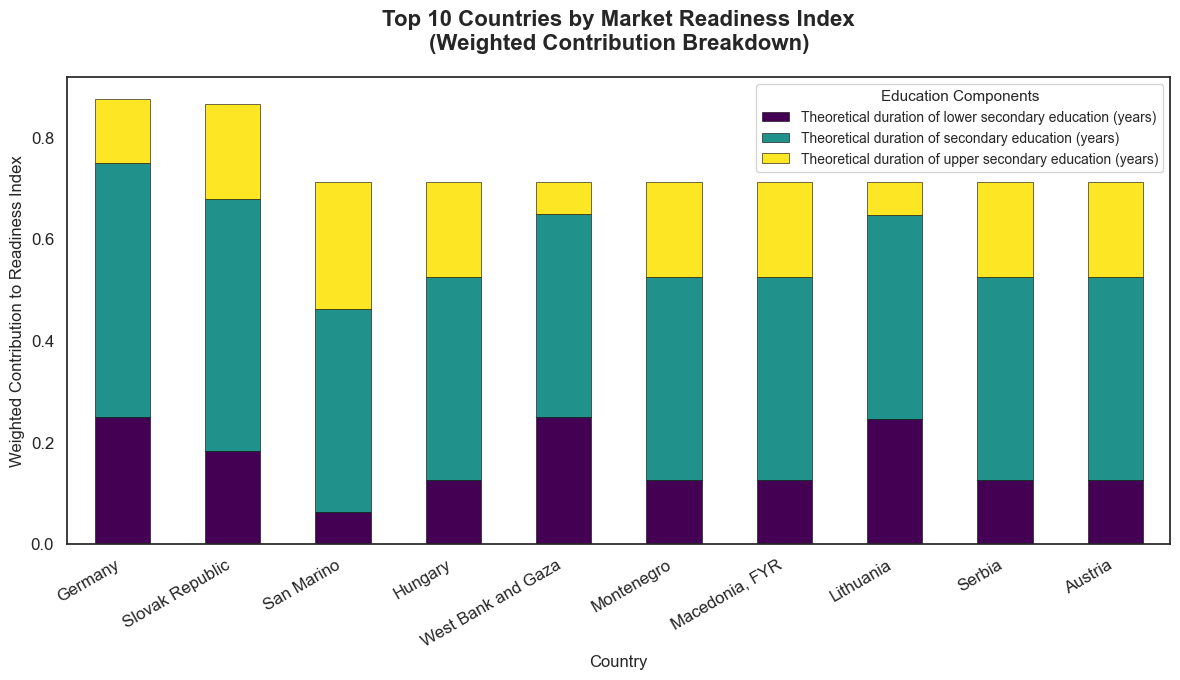

In [37]:
# ==============================================================================
# TOP 10 COUNTRIES BY MARKET READINESS INDEX – Weighted Stacked Bar Chart
# ==============================================================================

# Select top 10 countries by Readiness_Index
top10_readiness = (
    ready_market_df
    .sort_values(by="Readiness_Index", ascending=False)
    .head(10)
    .set_index("Country Name")
)

# --- Weighted stacking for visualization ---
weighted_df = top10_readiness[ready_market_cols].copy()
weights = [0.25, 0.50, 0.25]  

for col, w in zip(ready_market_cols, weights):
    weighted_df[col] = weighted_df[col] * w

# labels in the legend 
weighted_df = weighted_df.rename(columns=dict(zip(ready_market_cols, ready_market_cols_labels)))


ax = weighted_df.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    colormap="viridis",
    edgecolor="black",
    linewidth=0.4
)

plt.title("Top 10 Countries by Market Readiness Index\n(Weighted Contribution Breakdown)", 
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Weighted Contribution to Readiness Index", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Education Components", title_fontsize=11, fontsize=10)


plt.tight_layout()
plt.show()

## **Top 10 Countries by Market Readiness**

The chart shows market readiness scores decomposed by secondary education duration components. **Germany and Slovak Republic** lead with indices near 0.9, driven by strong total secondary duration (50% weight, teal). 

Most countries show similar patterns: **total secondary duration dominates contributions** (0.4-0.7), while lower secondary (purple) and upper secondary (yellow) components are more uniform. **Central/Eastern European countries** (Slovak Republic, Hungary, Serbia, Austria, Lithuania) cluster in the top 10, suggesting regional education system harmonization and potential for scalable multi-country strategies.

The balanced structure across Germany, West Bank and Gaza, and Lithuania contrasts with the compressed lower secondary systems in San Marino and Hungary, indicating diverse market entry approaches may be needed despite similar overall readiness scores.

In [38]:
# Columns for the ready market 
potential_market_cols = [ready for ready,_ in potential_market.items()]
potential_market_cols_labels = [ready for _,ready in potential_market.items()]

print(potential_market_cols )

potential_market_df = df[["Country Name"] + potential_market_cols].copy()

# Columns for the potential market
potential_market_cols = [
    "UIS.SLE.1",  # School life expectancy, primary, both sexes (years)
    "SE.PRM.ENRR", # Gross enrolment ratio, primary, both sexes (%)
    "SE.PRM.ENRL.FE.ZS",   # of students in primary education who are female (%)
    "SE.PRM.DURS",   # Theoretical duration of primary education (years)
    "SE.PRM.AGES",  # Official entrance age to primary education (years)
    "UIS.THAGE.0",  # Official entrance age to pre-primary education (years)
    "UIS.THDUR.0"   # Theoretical duration of pre-primary education (years)
]



# Corresponding weights (must sum to 1)
weights = [0.25, 0.25, 0.10, 0.10, 0.10, 0.10, 0.10]


# Create working dataframe
potential_market_df = df[["Country Name"] + potential_market_cols].copy()

# Compute weighted Potential Index
potential_market_df["Potential_Index"] = sum(
    potential_market_df[col] * w for col, w in zip(potential_market_cols, weights)
)

df_potential = (
    potential_market_df
    .set_index('Country Name')
)
display(df_potential.head())

['UIS.SLE.1', 'SE.PRM.ENRL', 'SE.PRM.ENRR', 'SE.PRM.AGES', 'SE.PRM.ENRL.FE.ZS', 'SE.PRM.DURS', 'UIS.THAGE.0', 'UIS.THDUR.0']


,UIS.SLE.1,SE.PRM.ENRR,SE.PRM.ENRL.FE.ZS,SE.PRM.DURS,SE.PRM.AGES,UIS.THAGE.0,UIS.THDUR.0,Potential_Index
Country Name,,,,,,,,
Afghanistan,0.392,0.391,0.000,0.590,0.972,0.02,0.922,0.446
Albania,0.306,0.502,0.863,0.253,0.500,0.02,0.667,0.432
Algeria,0.499,0.550,0.825,0.518,0.500,0.54,0.157,0.516
American Samoa,0.488,0.502,0.891,0.614,0.500,0.02,0.667,0.517
Andorra,0.488,0.502,0.836,0.578,0.500,0.02,0.667,0.508


### Visulise 

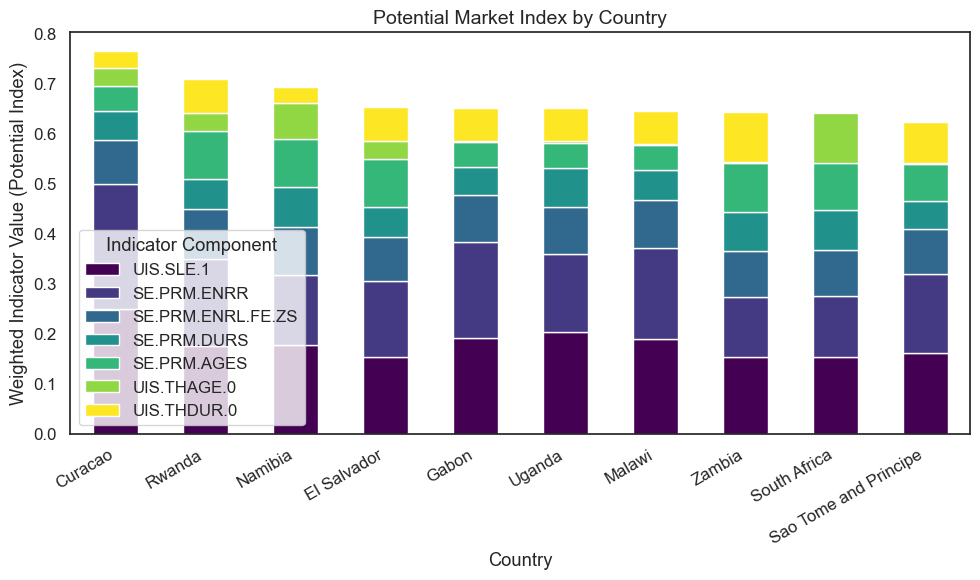

In [39]:
# Select top 10 countries by Potential Index
df_potential = (
    potential_market_df
    .sort_values(by="Potential_Index", ascending=False)
    .head(10)
    .set_index("Country Name")
)

# --- Weighted stacking for visualization ---
weighted_df = df_potential[potential_market_cols].copy()
for col, w in zip(potential_market_cols, weights):
    weighted_df[col] = weighted_df[col] * w

# Plot weighted stacked chart
ax = weighted_df.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="viridis"
)

plt.title("Potential Market Index by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Weighted Indicator Value (Potential Index)")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Indicator Component")
plt.tight_layout()
plt.show()



## **Top 10 Countries by Potential Market Index**

The chart displays composite market potential across seven education indicators, with **Curaçao leading at 0.76**, followed by Rwanda (0.71) and Namibia (0.69). 

**Key patterns:** Primary enrollment rates (SE.PRM.ENRR, blue-gray) and female enrollment share (SE.PRM.ENRL.FE.ZS, steel blue) contribute substantially across all countries, indicating strong foundational access. School life expectancy (UIS.SLE.1, dark purple) shows consistent contributions of 0.15-0.20, reflecting moderate education continuity.

**Regional insight:** The dominance of **Sub-Saharan African countries** (8 of 10) signals significant untapped market potential in the region, driven by improving enrollment metrics but with room for growth in tertiary indicators (yellow segments remain modest at 0.05-0.10).

Lower contributions from tertiary entry age and duration (top segments) across all countries suggest opportunities for **higher education expansion** as a differentiated market entry strategy.

# Insights

## Objective

* Describe the education landscape across countries, and

* Identify potential markets where Academy could expand (based on education demand and digital-learning relevance).


This analysis aimed to evaluate whether World Bank education indicators can provide useful insights to identify countries with strong potential for Academy’s international expansion.


---

## **Discussion and Conclusion**

The analysis reveals a globally consistent primary education structure, with entry typically at age six, a duration of five to six years, and near gender parity. This provides a strong foundation for scalable education initiatives.
More variation appears in secondary and tertiary levels, where differences in duration and progression reflect diverse curriculum frameworks and stages of system maturity.

The Market Readiness Index highlights Germany, the Slovak Republic, and San Marino as leading countries with balanced and extended secondary education systems that are well suited for advanced or specialized digital learning programs.
The Potential Market Index identifies Curaçao, Gabon, Malawi, Brazil, and Rwanda as promising growth markets with strong enrollment rates, gender equity, and steady learner progression.

Together, these results suggest that Academy should focus on countries that combine high readiness and strong potential, tailoring strategies as follows:

* **Advanced learning solutions** in mature education systems, such as high-readiness European markets
* **Foundational and secondary-level programs** in emerging markets with expanding participation

Overall, the World Bank education indicators provide sufficient insight to guide Mark’s decisions on online education expansion. The data offers a solid basis for identifying both ready and high-opportunity markets across the world.

